## Info About Dataset
**The key features are four urinary biomarkers: creatinine, LYVE1, REG1B, and TFF1.**

"Creatinine" is a protein that is often used as an indicator of kidney function.

"YVLE1" is lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis

"REG1B" is a protein that may be associated with pancreas regeneration

"TFF1" is trefoil factor 1, which may be related to regeneration and repair of the urinary tract

Age and sex, both included in the dataset, may also play a role in who gets pancreatic cancer. The dataset includes a few other biomarkers as well, but these were not measured in all patients (they were collected partly to measure how various blood biomarkers compared to urine biomarkers).

## Prediction task
**The goal in this dataset is predicting a " diagnosis " , and more specifically,
differentiating between 3 (pancreatic cancer) versus 2 (non-cancerous pancreas condition) and 1 (healthy).**

**The dataset includes information on stage of pancreatic cancer, and diagnosis for non-cancerous patients, but remember—these won't be available to a predictive model. The goal, after all, is to predict the presence of disease before it's diagnosed, not after!**

dataset_link = https://www.kaggle.com/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [4]:
data.shape

(590, 14)

In [5]:
(data.isnull().sum()/len(data))*100

sample_id                   0.000000
patient_cohort              0.000000
sample_origin               0.000000
age                         0.000000
sex                         0.000000
diagnosis                   0.000000
stage                      66.271186
benign_sample_diagnosis    64.745763
plasma_CA19_9              40.677966
creatinine                  0.000000
LYVE1                       0.000000
REG1B                       0.000000
TFF1                        0.000000
REG1A                      48.135593
dtype: float64

In [6]:
## Dropped Unncessary Columns
data.drop(['sample_id','stage','benign_sample_diagnosis','plasma_CA19_9','REG1A'],axis=1,inplace=True)

In [7]:
data.head()

,patient_cohort,sample_origin,age,sex,diagnosis,creatinine,LYVE1,REG1B,TFF1
0,Cohort1,BPTB,33,F,1,1.83222,0.893219,52.94884,654.282174
1,Cohort1,BPTB,81,F,1,0.97266,2.037585,94.46703,209.488250
2,Cohort2,BPTB,51,M,1,0.78039,0.145589,102.36600,461.141000
3,Cohort2,BPTB,61,M,1,0.70122,0.002805,60.57900,142.950000
4,Cohort2,BPTB,62,M,1,0.21489,0.000860,65.54000,41.088000


In [8]:
data.describe()

,age,diagnosis,creatinine,LYVE1,REG1B,TFF1
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,59.079661,2.027119,0.855383,3.063530,111.774090,597.868722
std,13.109520,0.804873,0.639028,3.438796,196.267110,1010.477245
min,26.000000,1.000000,0.056550,0.000129,0.001104,0.005293
25%,50.000000,1.000000,0.373230,0.167179,10.757216,43.961000
50%,60.000000,2.000000,0.723840,1.649862,34.303353,259.873974
75%,69.000000,3.000000,1.139482,5.205037,122.741013,742.736000
max,89.000000,3.000000,4.116840,23.890323,1403.897600,13344.300000


In [9]:
## Check for Duplicate Rows
def remove_duplicates(data):
    data.drop_duplicates(keep='first',inplace=True)
    return "Checked Duplicates"
remove_duplicates(data)

'Checked Duplicates'

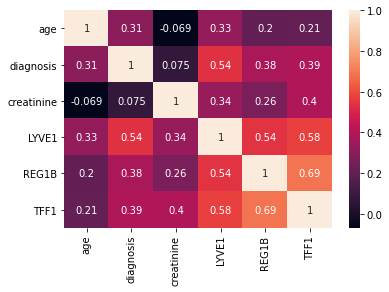

In [10]:
## Correlation Between Features
sns.heatmap(data.corr(),annot=True)

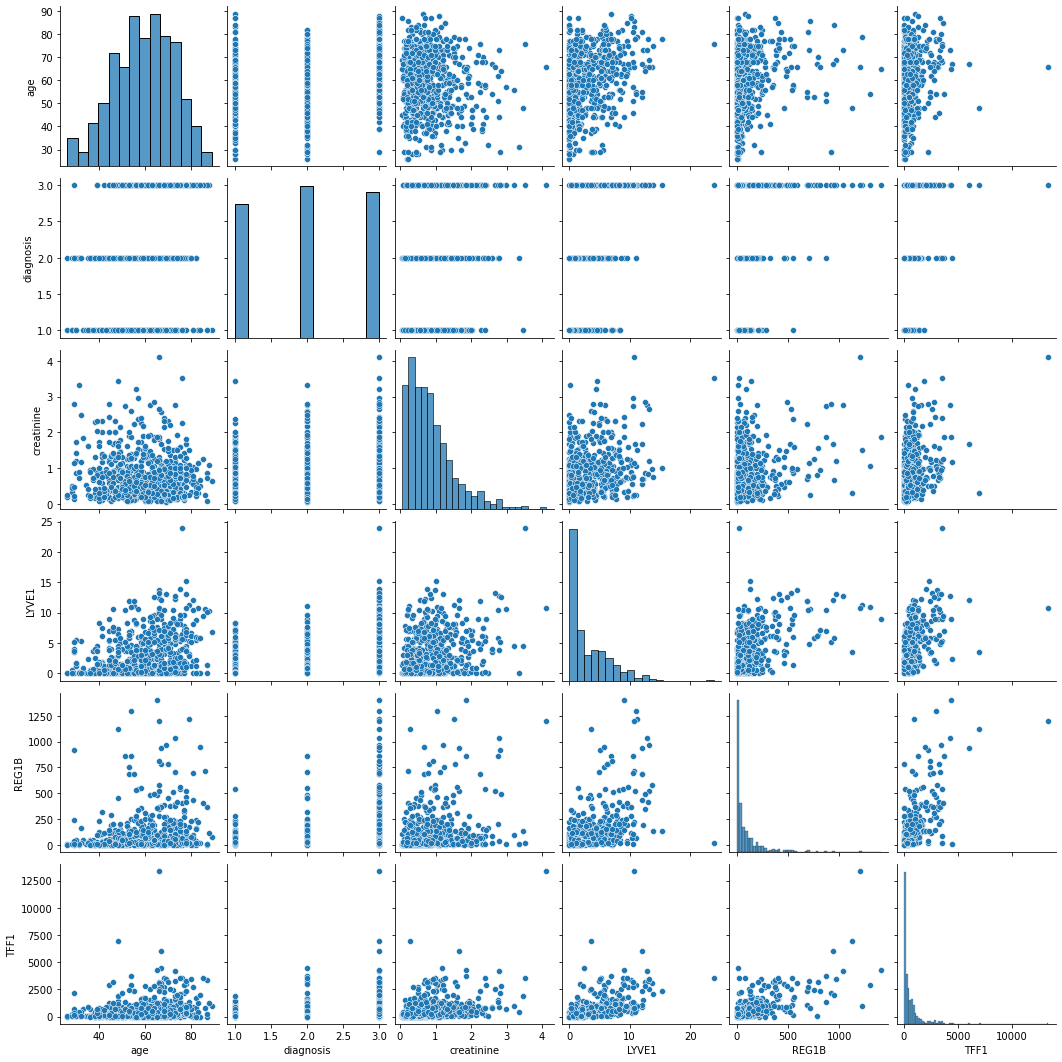

In [11]:
## Relation Between the Features
sns.pairplot(data)

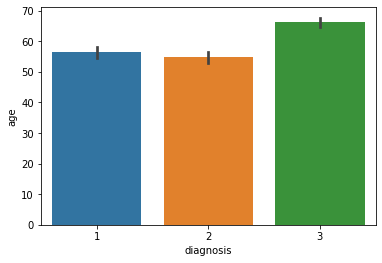

In [12]:
sns.barplot(data['diagnosis'],data['age'])

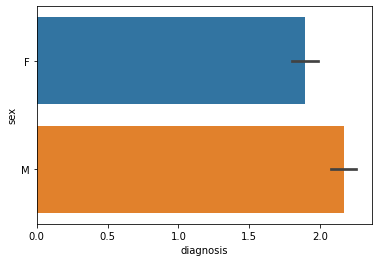

In [13]:
sns.barplot(data['diagnosis'],data['sex'])

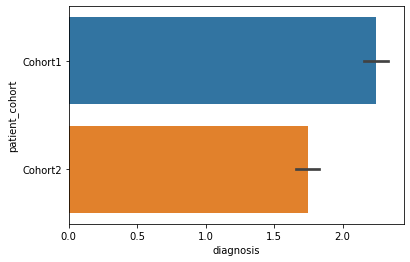

In [14]:
sns.barplot(data['diagnosis'],data['patient_cohort'])

In [15]:
## More Info About Categorical Features

display('Patient_Cohort',data['patient_cohort'].value_counts())
print('*'*100)
display('Sample_Origin',data['sample_origin'].value_counts())
print('*'*100)
display('sex',data['sex'].value_counts())

'Patient_Cohort'

Cohort1    332
Cohort2    258
Name: patient_cohort, dtype: int64

****************************************************************************************************


'Sample_Origin'

BPTB    409
LIV     132
ESP      29
UCL      20
Name: sample_origin, dtype: int64

****************************************************************************************************


'sex'

F    299
M    291
Name: sex, dtype: int64

In [16]:
## Encoding Categorical Columns
categorical_col = ['patient_cohort','sample_origin','sex']
for col in categorical_col:
    dummy = pd.get_dummies(data[col],prefix=col)
    data = pd.concat([data,dummy],axis=1)
    del data[col]

In [17]:
## Feature Selection 

X = data.drop(['diagnosis'],axis=1)
y = data['diagnosis']

In [18]:
X.head()

,age,creatinine,LYVE1,REG1B,TFF1,patient_cohort_Cohort1,patient_cohort_Cohort2,sample_origin_BPTB,sample_origin_ESP,sample_origin_LIV,sample_origin_UCL,sex_F,sex_M
0,33,1.83222,0.893219,52.94884,654.282174,1,0,1,0,0,0,1,0
1,81,0.97266,2.037585,94.46703,209.488250,1,0,1,0,0,0,1,0
2,51,0.78039,0.145589,102.36600,461.141000,0,1,1,0,0,0,0,1
3,61,0.70122,0.002805,60.57900,142.950000,0,1,1,0,0,0,0,1
4,62,0.21489,0.000860,65.54000,41.088000,0,1,1,0,0,0,0,1


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [20]:
## Feature Selection Techniques

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
ordered_rank_features = SelectKBest(score_func=chi2,k=13)
ordered_features = ordered_rank_features.fit(X,y)

In [22]:
dfscores = pd.DataFrame(ordered_features.scores_,columns=['Scores'])
dfcolumns = pd.DataFrame(X.columns)

In [23]:
features_rank = pd.concat([dfcolumns,dfscores],axis=1)

In [24]:
features_rank.columns=['Features','Scores']
features_rank.nlargest(13,'Scores')

,Features,Scores
4,TFF1,165038.109659
3,REG1B,35696.552038
2,LYVE1,752.013105
0,age,260.691790
9,sample_origin_LIV,94.948021
7,sample_origin_BPTB,46.743395
6,patient_cohort_Cohort2,43.434171
10,sample_origin_UCL,36.730769
5,patient_cohort_Cohort1,33.753061
8,sample_origin_ESP,28.603702


In [25]:
## Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [26]:
print(model.feature_importances_)

[0.14850188 0.12382278 0.19596179 0.1493355  0.15669419 0.02432054
 0.02637162 0.06767891 0.00935296 0.04356962 0.03025754 0.0109474
 0.01318527]


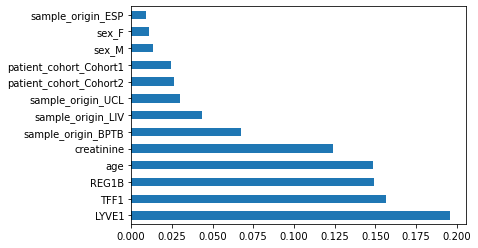

In [27]:
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(13).plot(kind='barh')
plt.show()


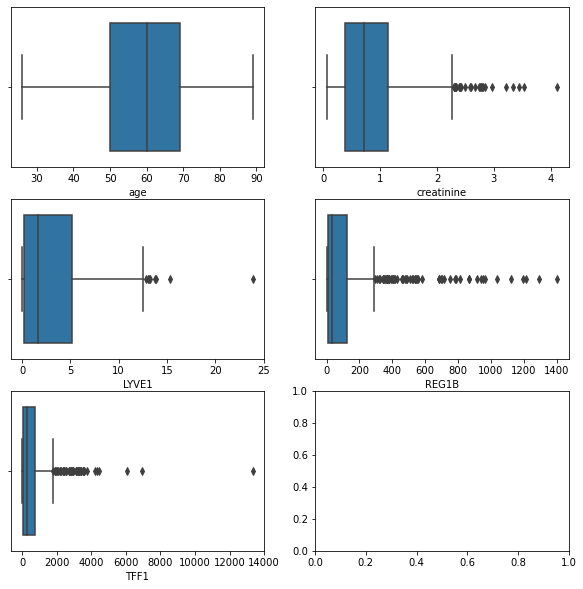

In [28]:
## Distribution of Numerical Columns

fig, axes = plt.subplots(figsize=(10,10), ncols=2, nrows=3)
sns.boxplot(data['age'],ax=axes[0,0])
sns.boxplot(data['creatinine'],ax=axes[0,1])
sns.boxplot(data['LYVE1'],ax=axes[1,0])
sns.boxplot(data['REG1B'],ax=axes[1,1])
sns.boxplot(data['TFF1'],ax=axes[2,0])

In [29]:
## Scaling of Numerical Columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[['age', 'creatinine', 'LYVE1','REG1B','TFF1']] = scaler.fit_transform(data[['age', 'creatinine', 'LYVE1','REG1B','TFF1']])

In [30]:
data.head()

,age,diagnosis,creatinine,LYVE1,REG1B,TFF1,patient_cohort_Cohort1,patient_cohort_Cohort2,sample_origin_BPTB,sample_origin_ESP,sample_origin_LIV,sample_origin_UCL,sex_F,sex_M
0,0.111111,1,0.437326,0.037383,0.037715,0.049030,1,0,1,0,0,0,1,0
1,0.873016,1,0.225627,0.085284,0.067288,0.015698,1,0,1,0,0,0,1,0
2,0.396825,1,0.178273,0.006089,0.072915,0.034557,0,1,1,0,0,0,0,1
3,0.555556,1,0.158774,0.000112,0.043150,0.010712,0,1,1,0,0,0,0,1
4,0.571429,1,0.038997,0.000031,0.046684,0.003079,0,1,1,0,0,0,0,1


In [31]:
data['diagnosis'].value_counts()

2    208
3    199
1    183
Name: diagnosis, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [33]:
## Machine Learning Classification Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [34]:
log_regression = LogisticRegression()
decision_tree_classifier = DecisionTreeClassifier()
xgboost_classifier = XGBClassifier()
catboost_classifier = CatBoostClassifier()
lgbm_classifier = LGBMClassifier()
rand_forest_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier()
svm_classifier = svm.LinearSVC()

ml_models = [log_regression, decision_tree_classifier, xgboost_classifier, catboost_classifier, lgbm_classifier, rand_forest_classifier, knn_classifier,svm_classifier]

In [35]:
best_accuracies = 0.0;
model_dict = {0:'LogisticRegression',1:'Decision_Tree_Classifier',2:'Xgboost_Classifier',3:'CatBoost_Classifier',4:'LGBM_Classifier',5:'Random_Forest_Classifier',6:'KNN_Classifier',7:'SVM_Classifier'}

In [36]:
for models in ml_models:
    models.fit(X_train, y_train)

0:	learn: 1.0875277	total: 146ms	remaining: 2m 25s
1:	learn: 1.0766301	total: 157ms	remaining: 1m 18s
2:	learn: 1.0662149	total: 167ms	remaining: 55.7s
3:	learn: 1.0538588	total: 176ms	remaining: 43.9s
4:	learn: 1.0448524	total: 182ms	remaining: 36.1s
5:	learn: 1.0333109	total: 187ms	remaining: 30.9s
6:	learn: 1.0228027	total: 192ms	remaining: 27.3s
7:	learn: 1.0124787	total: 197ms	remaining: 24.5s
8:	learn: 1.0029469	total: 203ms	remaining: 22.3s
9:	learn: 0.9948689	total: 208ms	remaining: 20.6s
10:	learn: 0.9862791	total: 213ms	remaining: 19.2s
11:	learn: 0.9780331	total: 219ms	remaining: 18s
12:	learn: 0.9701069	total: 224ms	remaining: 17s
13:	learn: 0.9623670	total: 229ms	remaining: 16.1s
14:	learn: 0.9513784	total: 234ms	remaining: 15.4s
15:	learn: 0.9432114	total: 240ms	remaining: 14.7s
16:	learn: 0.9360884	total: 245ms	remaining: 14.1s
17:	learn: 0.9276320	total: 249ms	remaining: 13.6s
18:	learn: 0.9215995	total: 253ms	remaining: 13.1s
19:	learn: 0.9151842	total: 257ms	remaining

164:	learn: 0.5361777	total: 657ms	remaining: 3.32s
165:	learn: 0.5355121	total: 658ms	remaining: 3.31s
166:	learn: 0.5338574	total: 661ms	remaining: 3.3s
167:	learn: 0.5328055	total: 664ms	remaining: 3.29s
168:	learn: 0.5315320	total: 667ms	remaining: 3.28s
169:	learn: 0.5300627	total: 670ms	remaining: 3.27s
170:	learn: 0.5292072	total: 673ms	remaining: 3.26s
171:	learn: 0.5284822	total: 676ms	remaining: 3.25s
172:	learn: 0.5272755	total: 679ms	remaining: 3.25s
173:	learn: 0.5261844	total: 682ms	remaining: 3.24s
174:	learn: 0.5252124	total: 685ms	remaining: 3.23s
175:	learn: 0.5241420	total: 689ms	remaining: 3.22s
176:	learn: 0.5227094	total: 693ms	remaining: 3.22s
177:	learn: 0.5216260	total: 696ms	remaining: 3.21s
178:	learn: 0.5210247	total: 699ms	remaining: 3.21s
179:	learn: 0.5200314	total: 704ms	remaining: 3.21s
180:	learn: 0.5191143	total: 707ms	remaining: 3.2s
181:	learn: 0.5181787	total: 710ms	remaining: 3.19s
182:	learn: 0.5170057	total: 713ms	remaining: 3.18s
183:	learn: 0.

337:	learn: 0.3938067	total: 1.16s	remaining: 2.28s
338:	learn: 0.3933990	total: 1.17s	remaining: 2.27s
339:	learn: 0.3927616	total: 1.17s	remaining: 2.27s
340:	learn: 0.3923463	total: 1.17s	remaining: 2.26s
341:	learn: 0.3915677	total: 1.17s	remaining: 2.26s
342:	learn: 0.3909697	total: 1.18s	remaining: 2.25s
343:	learn: 0.3903600	total: 1.18s	remaining: 2.25s
344:	learn: 0.3897513	total: 1.18s	remaining: 2.25s
345:	learn: 0.3889392	total: 1.19s	remaining: 2.24s
346:	learn: 0.3882471	total: 1.19s	remaining: 2.24s
347:	learn: 0.3876106	total: 1.19s	remaining: 2.23s
348:	learn: 0.3869928	total: 1.2s	remaining: 2.23s
349:	learn: 0.3864335	total: 1.2s	remaining: 2.23s
350:	learn: 0.3857478	total: 1.2s	remaining: 2.22s
351:	learn: 0.3849072	total: 1.2s	remaining: 2.21s
352:	learn: 0.3842502	total: 1.21s	remaining: 2.21s
353:	learn: 0.3838570	total: 1.21s	remaining: 2.21s
354:	learn: 0.3832177	total: 1.21s	remaining: 2.2s
355:	learn: 0.3826753	total: 1.21s	remaining: 2.2s
356:	learn: 0.3820

531:	learn: 0.3004152	total: 1.68s	remaining: 1.47s
532:	learn: 0.3000759	total: 1.68s	remaining: 1.47s
533:	learn: 0.2998795	total: 1.68s	remaining: 1.47s
534:	learn: 0.2993657	total: 1.68s	remaining: 1.46s
535:	learn: 0.2989966	total: 1.69s	remaining: 1.46s
536:	learn: 0.2987586	total: 1.69s	remaining: 1.46s
537:	learn: 0.2984566	total: 1.69s	remaining: 1.45s
538:	learn: 0.2980676	total: 1.7s	remaining: 1.45s
539:	learn: 0.2976740	total: 1.7s	remaining: 1.45s
540:	learn: 0.2971105	total: 1.7s	remaining: 1.44s
541:	learn: 0.2965534	total: 1.7s	remaining: 1.44s
542:	learn: 0.2963364	total: 1.71s	remaining: 1.44s
543:	learn: 0.2960755	total: 1.71s	remaining: 1.43s
544:	learn: 0.2957919	total: 1.71s	remaining: 1.43s
545:	learn: 0.2955273	total: 1.71s	remaining: 1.43s
546:	learn: 0.2950644	total: 1.72s	remaining: 1.42s
547:	learn: 0.2949052	total: 1.72s	remaining: 1.42s
548:	learn: 0.2945457	total: 1.72s	remaining: 1.42s
549:	learn: 0.2944056	total: 1.73s	remaining: 1.41s
550:	learn: 0.29

696:	learn: 0.2484232	total: 2.16s	remaining: 938ms
697:	learn: 0.2480913	total: 2.16s	remaining: 935ms
698:	learn: 0.2477140	total: 2.16s	remaining: 932ms
699:	learn: 0.2474208	total: 2.17s	remaining: 929ms
700:	learn: 0.2470083	total: 2.17s	remaining: 925ms
701:	learn: 0.2466952	total: 2.17s	remaining: 922ms
702:	learn: 0.2463925	total: 2.18s	remaining: 919ms
703:	learn: 0.2461341	total: 2.18s	remaining: 916ms
704:	learn: 0.2458347	total: 2.18s	remaining: 913ms
705:	learn: 0.2456440	total: 2.18s	remaining: 910ms
706:	learn: 0.2452988	total: 2.19s	remaining: 906ms
707:	learn: 0.2451429	total: 2.19s	remaining: 903ms
708:	learn: 0.2447807	total: 2.19s	remaining: 900ms
709:	learn: 0.2443608	total: 2.19s	remaining: 896ms
710:	learn: 0.2440605	total: 2.2s	remaining: 893ms
711:	learn: 0.2437418	total: 2.2s	remaining: 890ms
712:	learn: 0.2436448	total: 2.2s	remaining: 886ms
713:	learn: 0.2433685	total: 2.2s	remaining: 883ms
714:	learn: 0.2432288	total: 2.21s	remaining: 880ms
715:	learn: 0.24

875:	learn: 0.2047741	total: 2.64s	remaining: 374ms
876:	learn: 0.2046245	total: 2.64s	remaining: 371ms
877:	learn: 0.2044465	total: 2.65s	remaining: 368ms
878:	learn: 0.2042800	total: 2.65s	remaining: 364ms
879:	learn: 0.2039573	total: 2.65s	remaining: 361ms
880:	learn: 0.2037374	total: 2.65s	remaining: 358ms
881:	learn: 0.2036253	total: 2.66s	remaining: 355ms
882:	learn: 0.2035499	total: 2.66s	remaining: 352ms
883:	learn: 0.2033589	total: 2.66s	remaining: 349ms
884:	learn: 0.2031106	total: 2.66s	remaining: 346ms
885:	learn: 0.2028733	total: 2.67s	remaining: 343ms
886:	learn: 0.2026696	total: 2.67s	remaining: 340ms
887:	learn: 0.2024995	total: 2.67s	remaining: 337ms
888:	learn: 0.2022752	total: 2.67s	remaining: 334ms
889:	learn: 0.2020601	total: 2.68s	remaining: 331ms
890:	learn: 0.2018153	total: 2.68s	remaining: 328ms
891:	learn: 0.2016591	total: 2.68s	remaining: 325ms
892:	learn: 0.2014338	total: 2.69s	remaining: 322ms
893:	learn: 0.2013070	total: 2.69s	remaining: 319ms
894:	learn: 

In [37]:
for i, models in enumerate(ml_models):
    print( model_dict[i], models.score(X_test, y_test)) 

LogisticRegression 0.652542372881356
Decision_Tree_Classifier 0.6186440677966102
Xgboost_Classifier 0.7372881355932204
CatBoost_Classifier 0.711864406779661
LGBM_Classifier 0.6864406779661016
Random_Forest_Classifier 0.7542372881355932
KNN_Classifier 0.5338983050847458
SVM_Classifier 0.5169491525423728


In [38]:
## Model Accuracy Using Cross Validation Score
from sklearn.model_selection import cross_val_score
for i, models in enumerate(ml_models):
    print(model_dict[i], cross_val_score(models,X,y,cv=10).mean())


LogisticRegression 0.5728813559322034
Decision_Tree_Classifier 0.5864406779661018
Xgboost_Classifier 0.6372881355932203
0:	learn: 1.0876043	total: 5.88ms	remaining: 5.87s
1:	learn: 1.0759927	total: 9.36ms	remaining: 4.67s
2:	learn: 1.0641787	total: 12.4ms	remaining: 4.13s
3:	learn: 1.0509107	total: 15.8ms	remaining: 3.94s
4:	learn: 1.0395675	total: 19.1ms	remaining: 3.79s
5:	learn: 1.0301535	total: 22.2ms	remaining: 3.67s
6:	learn: 1.0209730	total: 25.3ms	remaining: 3.59s
7:	learn: 1.0085156	total: 28.2ms	remaining: 3.49s
8:	learn: 0.9979446	total: 31.3ms	remaining: 3.44s
9:	learn: 0.9890929	total: 33.7ms	remaining: 3.34s
10:	learn: 0.9795140	total: 36.2ms	remaining: 3.25s
11:	learn: 0.9693943	total: 38.7ms	remaining: 3.19s
12:	learn: 0.9616731	total: 41.2ms	remaining: 3.13s
13:	learn: 0.9531314	total: 43.7ms	remaining: 3.07s
14:	learn: 0.9438409	total: 46.2ms	remaining: 3.04s
15:	learn: 0.9367082	total: 48.7ms	remaining: 2.99s
16:	learn: 0.9293156	total: 51.3ms	remaining: 2.96s
17:	le

166:	learn: 0.5308017	total: 434ms	remaining: 2.17s
167:	learn: 0.5293524	total: 437ms	remaining: 2.17s
168:	learn: 0.5281618	total: 440ms	remaining: 2.16s
169:	learn: 0.5274188	total: 443ms	remaining: 2.16s
170:	learn: 0.5261540	total: 446ms	remaining: 2.16s
171:	learn: 0.5255064	total: 448ms	remaining: 2.16s
172:	learn: 0.5239789	total: 451ms	remaining: 2.15s
173:	learn: 0.5229591	total: 454ms	remaining: 2.15s
174:	learn: 0.5219267	total: 456ms	remaining: 2.15s
175:	learn: 0.5209314	total: 459ms	remaining: 2.15s
176:	learn: 0.5202061	total: 462ms	remaining: 2.15s
177:	learn: 0.5193710	total: 465ms	remaining: 2.15s
178:	learn: 0.5184698	total: 469ms	remaining: 2.15s
179:	learn: 0.5172660	total: 475ms	remaining: 2.16s
180:	learn: 0.5165505	total: 477ms	remaining: 2.16s
181:	learn: 0.5154067	total: 480ms	remaining: 2.16s
182:	learn: 0.5142032	total: 484ms	remaining: 2.16s
183:	learn: 0.5131247	total: 487ms	remaining: 2.16s
184:	learn: 0.5121969	total: 490ms	remaining: 2.16s
185:	learn: 

347:	learn: 0.3991546	total: 930ms	remaining: 1.74s
348:	learn: 0.3985167	total: 933ms	remaining: 1.74s
349:	learn: 0.3977102	total: 936ms	remaining: 1.74s
350:	learn: 0.3968455	total: 938ms	remaining: 1.74s
351:	learn: 0.3962508	total: 941ms	remaining: 1.73s
352:	learn: 0.3957614	total: 944ms	remaining: 1.73s
353:	learn: 0.3950363	total: 947ms	remaining: 1.73s
354:	learn: 0.3943944	total: 950ms	remaining: 1.73s
355:	learn: 0.3935916	total: 952ms	remaining: 1.72s
356:	learn: 0.3929761	total: 955ms	remaining: 1.72s
357:	learn: 0.3923867	total: 957ms	remaining: 1.72s
358:	learn: 0.3917809	total: 960ms	remaining: 1.71s
359:	learn: 0.3911628	total: 962ms	remaining: 1.71s
360:	learn: 0.3909055	total: 965ms	remaining: 1.71s
361:	learn: 0.3900166	total: 967ms	remaining: 1.7s
362:	learn: 0.3894325	total: 970ms	remaining: 1.7s
363:	learn: 0.3890194	total: 972ms	remaining: 1.7s
364:	learn: 0.3885785	total: 975ms	remaining: 1.7s
365:	learn: 0.3879679	total: 977ms	remaining: 1.69s
366:	learn: 0.38

535:	learn: 0.3113760	total: 1.42s	remaining: 1.23s
536:	learn: 0.3108250	total: 1.42s	remaining: 1.23s
537:	learn: 0.3104831	total: 1.43s	remaining: 1.23s
538:	learn: 0.3101473	total: 1.43s	remaining: 1.22s
539:	learn: 0.3096009	total: 1.43s	remaining: 1.22s
540:	learn: 0.3093487	total: 1.44s	remaining: 1.22s
541:	learn: 0.3089640	total: 1.44s	remaining: 1.22s
542:	learn: 0.3084192	total: 1.44s	remaining: 1.21s
543:	learn: 0.3081598	total: 1.45s	remaining: 1.21s
544:	learn: 0.3078750	total: 1.45s	remaining: 1.21s
545:	learn: 0.3074991	total: 1.45s	remaining: 1.21s
546:	learn: 0.3073545	total: 1.45s	remaining: 1.2s
547:	learn: 0.3069368	total: 1.46s	remaining: 1.2s
548:	learn: 0.3066772	total: 1.46s	remaining: 1.2s
549:	learn: 0.3063398	total: 1.46s	remaining: 1.2s
550:	learn: 0.3061648	total: 1.46s	remaining: 1.19s
551:	learn: 0.3058373	total: 1.47s	remaining: 1.19s
552:	learn: 0.3053280	total: 1.47s	remaining: 1.19s
553:	learn: 0.3050562	total: 1.47s	remaining: 1.19s
554:	learn: 0.30

737:	learn: 0.2506035	total: 1.93s	remaining: 686ms
738:	learn: 0.2502196	total: 1.93s	remaining: 683ms
739:	learn: 0.2499729	total: 1.94s	remaining: 681ms
740:	learn: 0.2498604	total: 1.94s	remaining: 678ms
741:	learn: 0.2494590	total: 1.94s	remaining: 676ms
742:	learn: 0.2491602	total: 1.95s	remaining: 673ms
743:	learn: 0.2487780	total: 1.95s	remaining: 670ms
744:	learn: 0.2485288	total: 1.95s	remaining: 668ms
745:	learn: 0.2481921	total: 1.95s	remaining: 665ms
746:	learn: 0.2479833	total: 1.96s	remaining: 663ms
747:	learn: 0.2476901	total: 1.96s	remaining: 660ms
748:	learn: 0.2473123	total: 1.96s	remaining: 657ms
749:	learn: 0.2469500	total: 1.96s	remaining: 655ms
750:	learn: 0.2467159	total: 1.97s	remaining: 652ms
751:	learn: 0.2465887	total: 1.97s	remaining: 650ms
752:	learn: 0.2462162	total: 1.97s	remaining: 647ms
753:	learn: 0.2461308	total: 1.97s	remaining: 644ms
754:	learn: 0.2458966	total: 1.98s	remaining: 642ms
755:	learn: 0.2455500	total: 1.98s	remaining: 639ms
756:	learn: 

930:	learn: 0.2076595	total: 2.42s	remaining: 179ms
931:	learn: 0.2075834	total: 2.42s	remaining: 177ms
932:	learn: 0.2074031	total: 2.42s	remaining: 174ms
933:	learn: 0.2072572	total: 2.43s	remaining: 171ms
934:	learn: 0.2070029	total: 2.43s	remaining: 169ms
935:	learn: 0.2067040	total: 2.43s	remaining: 166ms
936:	learn: 0.2064883	total: 2.44s	remaining: 164ms
937:	learn: 0.2063697	total: 2.44s	remaining: 161ms
938:	learn: 0.2062151	total: 2.44s	remaining: 159ms
939:	learn: 0.2061175	total: 2.44s	remaining: 156ms
940:	learn: 0.2058337	total: 2.44s	remaining: 153ms
941:	learn: 0.2056789	total: 2.45s	remaining: 151ms
942:	learn: 0.2054350	total: 2.45s	remaining: 148ms
943:	learn: 0.2052092	total: 2.45s	remaining: 146ms
944:	learn: 0.2051028	total: 2.46s	remaining: 143ms
945:	learn: 0.2048823	total: 2.46s	remaining: 140ms
946:	learn: 0.2047952	total: 2.46s	remaining: 138ms
947:	learn: 0.2045515	total: 2.46s	remaining: 135ms
948:	learn: 0.2044289	total: 2.46s	remaining: 133ms
949:	learn: 

104:	learn: 0.6192468	total: 341ms	remaining: 2.91s
105:	learn: 0.6176241	total: 344ms	remaining: 2.9s
106:	learn: 0.6158487	total: 347ms	remaining: 2.9s
107:	learn: 0.6140616	total: 350ms	remaining: 2.89s
108:	learn: 0.6129857	total: 353ms	remaining: 2.88s
109:	learn: 0.6108749	total: 356ms	remaining: 2.88s
110:	learn: 0.6088659	total: 358ms	remaining: 2.87s
111:	learn: 0.6071144	total: 362ms	remaining: 2.87s
112:	learn: 0.6058588	total: 364ms	remaining: 2.86s
113:	learn: 0.6039333	total: 367ms	remaining: 2.85s
114:	learn: 0.6029908	total: 369ms	remaining: 2.84s
115:	learn: 0.6015782	total: 372ms	remaining: 2.83s
116:	learn: 0.5997610	total: 375ms	remaining: 2.83s
117:	learn: 0.5982351	total: 378ms	remaining: 2.82s
118:	learn: 0.5975514	total: 380ms	remaining: 2.81s
119:	learn: 0.5963427	total: 383ms	remaining: 2.81s
120:	learn: 0.5948886	total: 385ms	remaining: 2.8s
121:	learn: 0.5935506	total: 388ms	remaining: 2.79s
122:	learn: 0.5922464	total: 390ms	remaining: 2.78s
123:	learn: 0.5

282:	learn: 0.4396900	total: 835ms	remaining: 2.11s
283:	learn: 0.4388485	total: 837ms	remaining: 2.11s
284:	learn: 0.4378830	total: 840ms	remaining: 2.11s
285:	learn: 0.4370970	total: 843ms	remaining: 2.1s
286:	learn: 0.4364357	total: 846ms	remaining: 2.1s
287:	learn: 0.4357401	total: 849ms	remaining: 2.1s
288:	learn: 0.4346691	total: 852ms	remaining: 2.1s
289:	learn: 0.4340866	total: 855ms	remaining: 2.09s
290:	learn: 0.4332357	total: 857ms	remaining: 2.09s
291:	learn: 0.4326627	total: 860ms	remaining: 2.08s
292:	learn: 0.4318916	total: 863ms	remaining: 2.08s
293:	learn: 0.4310999	total: 865ms	remaining: 2.08s
294:	learn: 0.4305171	total: 868ms	remaining: 2.07s
295:	learn: 0.4297384	total: 871ms	remaining: 2.07s
296:	learn: 0.4291167	total: 873ms	remaining: 2.07s
297:	learn: 0.4285655	total: 876ms	remaining: 2.06s
298:	learn: 0.4282396	total: 878ms	remaining: 2.06s
299:	learn: 0.4272966	total: 881ms	remaining: 2.05s
300:	learn: 0.4267117	total: 884ms	remaining: 2.05s
301:	learn: 0.42

469:	learn: 0.3290463	total: 1.32s	remaining: 1.49s
470:	learn: 0.3284723	total: 1.33s	remaining: 1.49s
471:	learn: 0.3282654	total: 1.33s	remaining: 1.49s
472:	learn: 0.3277096	total: 1.33s	remaining: 1.48s
473:	learn: 0.3271402	total: 1.33s	remaining: 1.48s
474:	learn: 0.3267897	total: 1.34s	remaining: 1.48s
475:	learn: 0.3265804	total: 1.34s	remaining: 1.48s
476:	learn: 0.3261380	total: 1.34s	remaining: 1.47s
477:	learn: 0.3257092	total: 1.35s	remaining: 1.47s
478:	learn: 0.3250284	total: 1.35s	remaining: 1.47s
479:	learn: 0.3245724	total: 1.35s	remaining: 1.46s
480:	learn: 0.3241646	total: 1.35s	remaining: 1.46s
481:	learn: 0.3238634	total: 1.36s	remaining: 1.46s
482:	learn: 0.3234581	total: 1.36s	remaining: 1.46s
483:	learn: 0.3230071	total: 1.36s	remaining: 1.45s
484:	learn: 0.3225361	total: 1.36s	remaining: 1.45s
485:	learn: 0.3221382	total: 1.37s	remaining: 1.45s
486:	learn: 0.3215844	total: 1.37s	remaining: 1.44s
487:	learn: 0.3211923	total: 1.37s	remaining: 1.44s
488:	learn: 

657:	learn: 0.2645343	total: 1.82s	remaining: 948ms
658:	learn: 0.2642757	total: 1.83s	remaining: 945ms
659:	learn: 0.2639002	total: 1.83s	remaining: 943ms
660:	learn: 0.2635992	total: 1.83s	remaining: 940ms
661:	learn: 0.2632088	total: 1.83s	remaining: 937ms
662:	learn: 0.2630006	total: 1.84s	remaining: 934ms
663:	learn: 0.2626149	total: 1.84s	remaining: 932ms
664:	learn: 0.2622442	total: 1.84s	remaining: 929ms
665:	learn: 0.2618091	total: 1.85s	remaining: 926ms
666:	learn: 0.2615824	total: 1.85s	remaining: 923ms
667:	learn: 0.2613223	total: 1.85s	remaining: 920ms
668:	learn: 0.2610704	total: 1.85s	remaining: 918ms
669:	learn: 0.2606987	total: 1.86s	remaining: 915ms
670:	learn: 0.2603101	total: 1.86s	remaining: 912ms
671:	learn: 0.2598962	total: 1.86s	remaining: 909ms
672:	learn: 0.2595948	total: 1.86s	remaining: 906ms
673:	learn: 0.2592185	total: 1.87s	remaining: 903ms
674:	learn: 0.2588910	total: 1.87s	remaining: 901ms
675:	learn: 0.2585750	total: 1.87s	remaining: 898ms
676:	learn: 

854:	learn: 0.2145250	total: 2.33s	remaining: 394ms
855:	learn: 0.2142494	total: 2.33s	remaining: 392ms
856:	learn: 0.2139962	total: 2.33s	remaining: 389ms
857:	learn: 0.2138631	total: 2.33s	remaining: 387ms
858:	learn: 0.2137802	total: 2.34s	remaining: 384ms
859:	learn: 0.2134852	total: 2.34s	remaining: 381ms
860:	learn: 0.2132236	total: 2.34s	remaining: 378ms
861:	learn: 0.2129107	total: 2.35s	remaining: 376ms
862:	learn: 0.2126788	total: 2.35s	remaining: 373ms
863:	learn: 0.2125900	total: 2.35s	remaining: 370ms
864:	learn: 0.2123560	total: 2.35s	remaining: 368ms
865:	learn: 0.2120970	total: 2.36s	remaining: 365ms
866:	learn: 0.2118628	total: 2.36s	remaining: 362ms
867:	learn: 0.2116560	total: 2.36s	remaining: 359ms
868:	learn: 0.2115333	total: 2.37s	remaining: 357ms
869:	learn: 0.2114585	total: 2.37s	remaining: 354ms
870:	learn: 0.2111915	total: 2.37s	remaining: 351ms
871:	learn: 0.2109182	total: 2.37s	remaining: 348ms
872:	learn: 0.2107106	total: 2.38s	remaining: 346ms
873:	learn: 

37:	learn: 0.8165964	total: 174ms	remaining: 4.4s
38:	learn: 0.8125163	total: 178ms	remaining: 4.39s
39:	learn: 0.8086978	total: 181ms	remaining: 4.34s
40:	learn: 0.8049973	total: 184ms	remaining: 4.29s
41:	learn: 0.7997423	total: 186ms	remaining: 4.25s
42:	learn: 0.7946587	total: 189ms	remaining: 4.21s
43:	learn: 0.7902188	total: 192ms	remaining: 4.17s
44:	learn: 0.7866380	total: 195ms	remaining: 4.13s
45:	learn: 0.7830363	total: 198ms	remaining: 4.1s
46:	learn: 0.7798256	total: 200ms	remaining: 4.06s
47:	learn: 0.7763933	total: 203ms	remaining: 4.02s
48:	learn: 0.7728460	total: 206ms	remaining: 3.99s
49:	learn: 0.7671884	total: 208ms	remaining: 3.96s
50:	learn: 0.7645258	total: 211ms	remaining: 3.93s
51:	learn: 0.7599516	total: 214ms	remaining: 3.9s
52:	learn: 0.7550363	total: 217ms	remaining: 3.87s
53:	learn: 0.7513969	total: 220ms	remaining: 3.85s
54:	learn: 0.7479532	total: 222ms	remaining: 3.82s
55:	learn: 0.7440186	total: 225ms	remaining: 3.79s
56:	learn: 0.7407250	total: 228ms	

228:	learn: 0.4765498	total: 667ms	remaining: 2.25s
229:	learn: 0.4755739	total: 670ms	remaining: 2.24s
230:	learn: 0.4747151	total: 673ms	remaining: 2.24s
231:	learn: 0.4739965	total: 677ms	remaining: 2.24s
232:	learn: 0.4729778	total: 680ms	remaining: 2.24s
233:	learn: 0.4720868	total: 682ms	remaining: 2.23s
234:	learn: 0.4712799	total: 685ms	remaining: 2.23s
235:	learn: 0.4706843	total: 688ms	remaining: 2.23s
236:	learn: 0.4696445	total: 691ms	remaining: 2.22s
237:	learn: 0.4691545	total: 694ms	remaining: 2.22s
238:	learn: 0.4685147	total: 696ms	remaining: 2.22s
239:	learn: 0.4677764	total: 699ms	remaining: 2.21s
240:	learn: 0.4669633	total: 702ms	remaining: 2.21s
241:	learn: 0.4661294	total: 705ms	remaining: 2.21s
242:	learn: 0.4654945	total: 707ms	remaining: 2.2s
243:	learn: 0.4646243	total: 710ms	remaining: 2.2s
244:	learn: 0.4637525	total: 712ms	remaining: 2.19s
245:	learn: 0.4627312	total: 715ms	remaining: 2.19s
246:	learn: 0.4618774	total: 718ms	remaining: 2.19s
247:	learn: 0.

423:	learn: 0.3538654	total: 1.16s	remaining: 1.58s
424:	learn: 0.3535143	total: 1.17s	remaining: 1.58s
425:	learn: 0.3530443	total: 1.17s	remaining: 1.58s
426:	learn: 0.3526882	total: 1.17s	remaining: 1.57s
427:	learn: 0.3523149	total: 1.18s	remaining: 1.57s
428:	learn: 0.3519566	total: 1.18s	remaining: 1.57s
429:	learn: 0.3516329	total: 1.18s	remaining: 1.57s
430:	learn: 0.3510962	total: 1.18s	remaining: 1.56s
431:	learn: 0.3507570	total: 1.19s	remaining: 1.56s
432:	learn: 0.3503390	total: 1.19s	remaining: 1.56s
433:	learn: 0.3498009	total: 1.19s	remaining: 1.55s
434:	learn: 0.3494556	total: 1.19s	remaining: 1.55s
435:	learn: 0.3490328	total: 1.2s	remaining: 1.55s
436:	learn: 0.3487217	total: 1.2s	remaining: 1.55s
437:	learn: 0.3481204	total: 1.2s	remaining: 1.54s
438:	learn: 0.3474353	total: 1.21s	remaining: 1.54s
439:	learn: 0.3468582	total: 1.21s	remaining: 1.54s
440:	learn: 0.3462990	total: 1.21s	remaining: 1.53s
441:	learn: 0.3458868	total: 1.21s	remaining: 1.53s
442:	learn: 0.3

596:	learn: 0.2839823	total: 1.64s	remaining: 1.11s
597:	learn: 0.2834246	total: 1.64s	remaining: 1.1s
598:	learn: 0.2830560	total: 1.65s	remaining: 1.1s
599:	learn: 0.2827780	total: 1.65s	remaining: 1.1s
600:	learn: 0.2825714	total: 1.65s	remaining: 1.1s
601:	learn: 0.2824206	total: 1.65s	remaining: 1.09s
602:	learn: 0.2821193	total: 1.66s	remaining: 1.09s
603:	learn: 0.2817897	total: 1.66s	remaining: 1.09s
604:	learn: 0.2813961	total: 1.66s	remaining: 1.08s
605:	learn: 0.2810401	total: 1.67s	remaining: 1.08s
606:	learn: 0.2806668	total: 1.67s	remaining: 1.08s
607:	learn: 0.2800716	total: 1.67s	remaining: 1.08s
608:	learn: 0.2795904	total: 1.67s	remaining: 1.07s
609:	learn: 0.2792282	total: 1.68s	remaining: 1.07s
610:	learn: 0.2788490	total: 1.68s	remaining: 1.07s
611:	learn: 0.2785165	total: 1.68s	remaining: 1.06s
612:	learn: 0.2783391	total: 1.68s	remaining: 1.06s
613:	learn: 0.2778845	total: 1.69s	remaining: 1.06s
614:	learn: 0.2776660	total: 1.69s	remaining: 1.06s
615:	learn: 0.27

797:	learn: 0.2284730	total: 2.15s	remaining: 543ms
798:	learn: 0.2281285	total: 2.15s	remaining: 541ms
799:	learn: 0.2279014	total: 2.15s	remaining: 538ms
800:	learn: 0.2278360	total: 2.15s	remaining: 535ms
801:	learn: 0.2276535	total: 2.16s	remaining: 533ms
802:	learn: 0.2273873	total: 2.16s	remaining: 530ms
803:	learn: 0.2271313	total: 2.16s	remaining: 527ms
804:	learn: 0.2268344	total: 2.17s	remaining: 525ms
805:	learn: 0.2267367	total: 2.17s	remaining: 522ms
806:	learn: 0.2264967	total: 2.17s	remaining: 519ms
807:	learn: 0.2263429	total: 2.17s	remaining: 516ms
808:	learn: 0.2261529	total: 2.18s	remaining: 514ms
809:	learn: 0.2259514	total: 2.18s	remaining: 511ms
810:	learn: 0.2255900	total: 2.18s	remaining: 508ms
811:	learn: 0.2253196	total: 2.18s	remaining: 506ms
812:	learn: 0.2251581	total: 2.19s	remaining: 503ms
813:	learn: 0.2247627	total: 2.19s	remaining: 500ms
814:	learn: 0.2245648	total: 2.19s	remaining: 498ms
815:	learn: 0.2242953	total: 2.19s	remaining: 495ms
816:	learn: 

995:	learn: 0.1890424	total: 2.65s	remaining: 10.6ms
996:	learn: 0.1888255	total: 2.65s	remaining: 7.97ms
997:	learn: 0.1886182	total: 2.65s	remaining: 5.31ms
998:	learn: 0.1884347	total: 2.65s	remaining: 2.66ms
999:	learn: 0.1882306	total: 2.66s	remaining: 0us
0:	learn: 1.0858625	total: 8.76ms	remaining: 8.76s
1:	learn: 1.0738781	total: 14.5ms	remaining: 7.25s
2:	learn: 1.0639919	total: 19.7ms	remaining: 6.53s
3:	learn: 1.0547329	total: 24.6ms	remaining: 6.14s
4:	learn: 1.0459944	total: 29.9ms	remaining: 5.95s
5:	learn: 1.0365319	total: 35ms	remaining: 5.79s
6:	learn: 1.0280185	total: 40.5ms	remaining: 5.75s
7:	learn: 1.0169451	total: 46.1ms	remaining: 5.72s
8:	learn: 1.0067416	total: 51.8ms	remaining: 5.7s
9:	learn: 0.9980571	total: 57ms	remaining: 5.65s
10:	learn: 0.9902972	total: 62.2ms	remaining: 5.6s
11:	learn: 0.9800729	total: 65.4ms	remaining: 5.38s
12:	learn: 0.9720225	total: 70.8ms	remaining: 5.38s
13:	learn: 0.9630434	total: 76ms	remaining: 5.35s
14:	learn: 0.9536060	total: 

174:	learn: 0.5362205	total: 509ms	remaining: 2.4s
175:	learn: 0.5353815	total: 513ms	remaining: 2.4s
176:	learn: 0.5347329	total: 515ms	remaining: 2.4s
177:	learn: 0.5335867	total: 518ms	remaining: 2.39s
178:	learn: 0.5321374	total: 521ms	remaining: 2.39s
179:	learn: 0.5305682	total: 524ms	remaining: 2.38s
180:	learn: 0.5295827	total: 526ms	remaining: 2.38s
181:	learn: 0.5283463	total: 530ms	remaining: 2.38s
182:	learn: 0.5277573	total: 531ms	remaining: 2.37s
183:	learn: 0.5265657	total: 533ms	remaining: 2.37s
184:	learn: 0.5258625	total: 536ms	remaining: 2.36s
185:	learn: 0.5251684	total: 538ms	remaining: 2.35s
186:	learn: 0.5244641	total: 541ms	remaining: 2.35s
187:	learn: 0.5234027	total: 543ms	remaining: 2.35s
188:	learn: 0.5225120	total: 546ms	remaining: 2.34s
189:	learn: 0.5218980	total: 548ms	remaining: 2.34s
190:	learn: 0.5206085	total: 551ms	remaining: 2.33s
191:	learn: 0.5198077	total: 553ms	remaining: 2.33s
192:	learn: 0.5192405	total: 556ms	remaining: 2.32s
193:	learn: 0.5

366:	learn: 0.3935142	total: 1s	remaining: 1.72s
367:	learn: 0.3929865	total: 1s	remaining: 1.72s
368:	learn: 0.3926506	total: 1s	remaining: 1.72s
369:	learn: 0.3921482	total: 1.01s	remaining: 1.72s
370:	learn: 0.3915734	total: 1.01s	remaining: 1.71s
371:	learn: 0.3910235	total: 1.01s	remaining: 1.71s
372:	learn: 0.3902468	total: 1.02s	remaining: 1.71s
373:	learn: 0.3896956	total: 1.02s	remaining: 1.71s
374:	learn: 0.3888813	total: 1.02s	remaining: 1.7s
375:	learn: 0.3883676	total: 1.02s	remaining: 1.7s
376:	learn: 0.3878569	total: 1.03s	remaining: 1.7s
377:	learn: 0.3870455	total: 1.03s	remaining: 1.7s
378:	learn: 0.3864635	total: 1.03s	remaining: 1.69s
379:	learn: 0.3857905	total: 1.04s	remaining: 1.69s
380:	learn: 0.3851357	total: 1.04s	remaining: 1.69s
381:	learn: 0.3844624	total: 1.04s	remaining: 1.68s
382:	learn: 0.3840254	total: 1.04s	remaining: 1.68s
383:	learn: 0.3837535	total: 1.05s	remaining: 1.68s
384:	learn: 0.3830529	total: 1.05s	remaining: 1.68s
385:	learn: 0.3826183	tot

553:	learn: 0.3124193	total: 1.5s	remaining: 1.21s
554:	learn: 0.3117241	total: 1.5s	remaining: 1.21s
555:	learn: 0.3112960	total: 1.51s	remaining: 1.2s
556:	learn: 0.3109177	total: 1.51s	remaining: 1.2s
557:	learn: 0.3104628	total: 1.51s	remaining: 1.2s
558:	learn: 0.3101019	total: 1.51s	remaining: 1.2s
559:	learn: 0.3097402	total: 1.52s	remaining: 1.19s
560:	learn: 0.3094265	total: 1.52s	remaining: 1.19s
561:	learn: 0.3091171	total: 1.52s	remaining: 1.19s
562:	learn: 0.3087968	total: 1.52s	remaining: 1.18s
563:	learn: 0.3085168	total: 1.53s	remaining: 1.18s
564:	learn: 0.3081502	total: 1.53s	remaining: 1.18s
565:	learn: 0.3078104	total: 1.53s	remaining: 1.18s
566:	learn: 0.3072502	total: 1.54s	remaining: 1.17s
567:	learn: 0.3069345	total: 1.54s	remaining: 1.17s
568:	learn: 0.3065812	total: 1.54s	remaining: 1.17s
569:	learn: 0.3061854	total: 1.54s	remaining: 1.16s
570:	learn: 0.3058013	total: 1.54s	remaining: 1.16s
571:	learn: 0.3052732	total: 1.55s	remaining: 1.16s
572:	learn: 0.3048

751:	learn: 0.2501107	total: 2.01s	remaining: 662ms
752:	learn: 0.2498479	total: 2.01s	remaining: 659ms
753:	learn: 0.2497237	total: 2.01s	remaining: 656ms
754:	learn: 0.2495752	total: 2.01s	remaining: 654ms
755:	learn: 0.2491764	total: 2.02s	remaining: 651ms
756:	learn: 0.2488701	total: 2.02s	remaining: 648ms
757:	learn: 0.2486103	total: 2.02s	remaining: 646ms
758:	learn: 0.2484925	total: 2.02s	remaining: 643ms
759:	learn: 0.2482619	total: 2.03s	remaining: 641ms
760:	learn: 0.2480175	total: 2.03s	remaining: 638ms
761:	learn: 0.2476633	total: 2.03s	remaining: 635ms
762:	learn: 0.2474119	total: 2.04s	remaining: 633ms
763:	learn: 0.2471839	total: 2.04s	remaining: 630ms
764:	learn: 0.2470463	total: 2.04s	remaining: 627ms
765:	learn: 0.2467563	total: 2.04s	remaining: 624ms
766:	learn: 0.2465663	total: 2.05s	remaining: 622ms
767:	learn: 0.2462577	total: 2.05s	remaining: 619ms
768:	learn: 0.2461677	total: 2.05s	remaining: 616ms
769:	learn: 0.2460073	total: 2.05s	remaining: 614ms
770:	learn: 

934:	learn: 0.2087746	total: 2.49s	remaining: 173ms
935:	learn: 0.2085022	total: 2.5s	remaining: 171ms
936:	learn: 0.2083594	total: 2.5s	remaining: 168ms
937:	learn: 0.2082106	total: 2.5s	remaining: 165ms
938:	learn: 0.2079430	total: 2.5s	remaining: 163ms
939:	learn: 0.2075401	total: 2.51s	remaining: 160ms
940:	learn: 0.2073243	total: 2.51s	remaining: 157ms
941:	learn: 0.2070545	total: 2.51s	remaining: 155ms
942:	learn: 0.2068193	total: 2.52s	remaining: 152ms
943:	learn: 0.2066695	total: 2.52s	remaining: 150ms
944:	learn: 0.2064759	total: 2.52s	remaining: 147ms
945:	learn: 0.2062097	total: 2.53s	remaining: 144ms
946:	learn: 0.2060917	total: 2.53s	remaining: 142ms
947:	learn: 0.2058051	total: 2.53s	remaining: 139ms
948:	learn: 0.2057163	total: 2.54s	remaining: 136ms
949:	learn: 0.2054223	total: 2.54s	remaining: 134ms
950:	learn: 0.2052251	total: 2.54s	remaining: 131ms
951:	learn: 0.2050469	total: 2.54s	remaining: 128ms
952:	learn: 0.2048261	total: 2.55s	remaining: 126ms
953:	learn: 0.20

111:	learn: 0.5782054	total: 339ms	remaining: 2.69s
112:	learn: 0.5765050	total: 342ms	remaining: 2.68s
113:	learn: 0.5751482	total: 345ms	remaining: 2.68s
114:	learn: 0.5738731	total: 347ms	remaining: 2.67s
115:	learn: 0.5720234	total: 350ms	remaining: 2.67s
116:	learn: 0.5707621	total: 353ms	remaining: 2.67s
117:	learn: 0.5692589	total: 356ms	remaining: 2.66s
118:	learn: 0.5677565	total: 359ms	remaining: 2.66s
119:	learn: 0.5664406	total: 362ms	remaining: 2.65s
120:	learn: 0.5654001	total: 364ms	remaining: 2.65s
121:	learn: 0.5636137	total: 367ms	remaining: 2.64s
122:	learn: 0.5620667	total: 370ms	remaining: 2.63s
123:	learn: 0.5608072	total: 372ms	remaining: 2.63s
124:	learn: 0.5591957	total: 375ms	remaining: 2.62s
125:	learn: 0.5573618	total: 377ms	remaining: 2.62s
126:	learn: 0.5561679	total: 380ms	remaining: 2.61s
127:	learn: 0.5544708	total: 383ms	remaining: 2.61s
128:	learn: 0.5529870	total: 385ms	remaining: 2.6s
129:	learn: 0.5521819	total: 388ms	remaining: 2.6s
130:	learn: 0.

306:	learn: 0.4058859	total: 846ms	remaining: 1.91s
307:	learn: 0.4052149	total: 849ms	remaining: 1.91s
308:	learn: 0.4047010	total: 852ms	remaining: 1.9s
309:	learn: 0.4041145	total: 854ms	remaining: 1.9s
310:	learn: 0.4036158	total: 858ms	remaining: 1.9s
311:	learn: 0.4030182	total: 860ms	remaining: 1.9s
312:	learn: 0.4025387	total: 863ms	remaining: 1.89s
313:	learn: 0.4018065	total: 866ms	remaining: 1.89s
314:	learn: 0.4014424	total: 869ms	remaining: 1.89s
315:	learn: 0.4007086	total: 872ms	remaining: 1.89s
316:	learn: 0.4000287	total: 875ms	remaining: 1.88s
317:	learn: 0.3990466	total: 877ms	remaining: 1.88s
318:	learn: 0.3983239	total: 880ms	remaining: 1.88s
319:	learn: 0.3976579	total: 882ms	remaining: 1.88s
320:	learn: 0.3974308	total: 885ms	remaining: 1.87s
321:	learn: 0.3964791	total: 887ms	remaining: 1.87s
322:	learn: 0.3958823	total: 890ms	remaining: 1.86s
323:	learn: 0.3949665	total: 893ms	remaining: 1.86s
324:	learn: 0.3946790	total: 895ms	remaining: 1.86s
325:	learn: 0.39

507:	learn: 0.3090286	total: 1.34s	remaining: 1.3s
508:	learn: 0.3088202	total: 1.35s	remaining: 1.3s
509:	learn: 0.3083459	total: 1.35s	remaining: 1.3s
510:	learn: 0.3078869	total: 1.35s	remaining: 1.29s
511:	learn: 0.3076633	total: 1.36s	remaining: 1.29s
512:	learn: 0.3072458	total: 1.36s	remaining: 1.29s
513:	learn: 0.3067820	total: 1.36s	remaining: 1.29s
514:	learn: 0.3066217	total: 1.36s	remaining: 1.29s
515:	learn: 0.3061300	total: 1.37s	remaining: 1.28s
516:	learn: 0.3054163	total: 1.37s	remaining: 1.28s
517:	learn: 0.3052856	total: 1.37s	remaining: 1.28s
518:	learn: 0.3049008	total: 1.38s	remaining: 1.27s
519:	learn: 0.3046280	total: 1.38s	remaining: 1.27s
520:	learn: 0.3042284	total: 1.38s	remaining: 1.27s
521:	learn: 0.3038946	total: 1.38s	remaining: 1.27s
522:	learn: 0.3033816	total: 1.39s	remaining: 1.26s
523:	learn: 0.3029689	total: 1.39s	remaining: 1.26s
524:	learn: 0.3027115	total: 1.39s	remaining: 1.26s
525:	learn: 0.3022974	total: 1.39s	remaining: 1.26s
526:	learn: 0.3

703:	learn: 0.2470217	total: 1.85s	remaining: 776ms
704:	learn: 0.2465700	total: 1.85s	remaining: 774ms
705:	learn: 0.2462745	total: 1.85s	remaining: 771ms
706:	learn: 0.2459336	total: 1.85s	remaining: 769ms
707:	learn: 0.2456047	total: 1.86s	remaining: 766ms
708:	learn: 0.2452962	total: 1.86s	remaining: 764ms
709:	learn: 0.2450541	total: 1.86s	remaining: 761ms
710:	learn: 0.2447908	total: 1.87s	remaining: 759ms
711:	learn: 0.2444775	total: 1.87s	remaining: 756ms
712:	learn: 0.2439993	total: 1.87s	remaining: 753ms
713:	learn: 0.2436320	total: 1.87s	remaining: 751ms
714:	learn: 0.2432491	total: 1.88s	remaining: 748ms
715:	learn: 0.2429641	total: 1.88s	remaining: 745ms
716:	learn: 0.2426948	total: 1.88s	remaining: 743ms
717:	learn: 0.2424063	total: 1.88s	remaining: 740ms
718:	learn: 0.2422208	total: 1.89s	remaining: 737ms
719:	learn: 0.2418905	total: 1.89s	remaining: 735ms
720:	learn: 0.2416075	total: 1.89s	remaining: 732ms
721:	learn: 0.2412229	total: 1.89s	remaining: 729ms
722:	learn: 

897:	learn: 0.2039231	total: 2.34s	remaining: 266ms
898:	learn: 0.2037343	total: 2.34s	remaining: 263ms
899:	learn: 0.2035318	total: 2.34s	remaining: 260ms
900:	learn: 0.2032660	total: 2.35s	remaining: 258ms
901:	learn: 0.2031146	total: 2.35s	remaining: 255ms
902:	learn: 0.2027681	total: 2.35s	remaining: 253ms
903:	learn: 0.2026181	total: 2.35s	remaining: 250ms
904:	learn: 0.2023313	total: 2.36s	remaining: 248ms
905:	learn: 0.2021239	total: 2.36s	remaining: 245ms
906:	learn: 0.2019138	total: 2.36s	remaining: 242ms
907:	learn: 0.2016781	total: 2.37s	remaining: 240ms
908:	learn: 0.2015867	total: 2.37s	remaining: 237ms
909:	learn: 0.2014630	total: 2.37s	remaining: 234ms
910:	learn: 0.2012734	total: 2.37s	remaining: 232ms
911:	learn: 0.2010988	total: 2.38s	remaining: 229ms
912:	learn: 0.2008329	total: 2.38s	remaining: 227ms
913:	learn: 0.2005994	total: 2.38s	remaining: 224ms
914:	learn: 0.2003636	total: 2.38s	remaining: 221ms
915:	learn: 0.2000455	total: 2.38s	remaining: 219ms
916:	learn: 

92:	learn: 0.6402820	total: 335ms	remaining: 3.26s
93:	learn: 0.6381910	total: 338ms	remaining: 3.25s
94:	learn: 0.6365666	total: 340ms	remaining: 3.24s
95:	learn: 0.6355947	total: 343ms	remaining: 3.23s
96:	learn: 0.6336619	total: 346ms	remaining: 3.22s
97:	learn: 0.6320366	total: 349ms	remaining: 3.21s
98:	learn: 0.6300243	total: 352ms	remaining: 3.2s
99:	learn: 0.6282971	total: 354ms	remaining: 3.19s
100:	learn: 0.6260255	total: 357ms	remaining: 3.18s
101:	learn: 0.6236762	total: 361ms	remaining: 3.17s
102:	learn: 0.6217745	total: 363ms	remaining: 3.16s
103:	learn: 0.6200122	total: 366ms	remaining: 3.15s
104:	learn: 0.6178911	total: 369ms	remaining: 3.14s
105:	learn: 0.6166707	total: 371ms	remaining: 3.13s
106:	learn: 0.6152700	total: 374ms	remaining: 3.12s
107:	learn: 0.6140269	total: 377ms	remaining: 3.11s
108:	learn: 0.6122128	total: 379ms	remaining: 3.1s
109:	learn: 0.6108910	total: 382ms	remaining: 3.09s
110:	learn: 0.6083225	total: 384ms	remaining: 3.08s
111:	learn: 0.6068638	

283:	learn: 0.4362424	total: 828ms	remaining: 2.09s
284:	learn: 0.4352141	total: 831ms	remaining: 2.08s
285:	learn: 0.4346621	total: 834ms	remaining: 2.08s
286:	learn: 0.4337379	total: 837ms	remaining: 2.08s
287:	learn: 0.4331597	total: 839ms	remaining: 2.08s
288:	learn: 0.4325738	total: 842ms	remaining: 2.07s
289:	learn: 0.4316047	total: 845ms	remaining: 2.07s
290:	learn: 0.4310603	total: 848ms	remaining: 2.07s
291:	learn: 0.4303876	total: 851ms	remaining: 2.06s
292:	learn: 0.4300140	total: 854ms	remaining: 2.06s
293:	learn: 0.4292687	total: 856ms	remaining: 2.06s
294:	learn: 0.4282756	total: 859ms	remaining: 2.05s
295:	learn: 0.4277635	total: 861ms	remaining: 2.05s
296:	learn: 0.4272173	total: 864ms	remaining: 2.04s
297:	learn: 0.4265311	total: 866ms	remaining: 2.04s
298:	learn: 0.4256624	total: 869ms	remaining: 2.04s
299:	learn: 0.4248245	total: 872ms	remaining: 2.03s
300:	learn: 0.4240306	total: 874ms	remaining: 2.03s
301:	learn: 0.4230297	total: 877ms	remaining: 2.03s
302:	learn: 

473:	learn: 0.3310399	total: 1.33s	remaining: 1.48s
474:	learn: 0.3306670	total: 1.33s	remaining: 1.48s
475:	learn: 0.3303475	total: 1.34s	remaining: 1.47s
476:	learn: 0.3298640	total: 1.34s	remaining: 1.47s
477:	learn: 0.3296255	total: 1.34s	remaining: 1.47s
478:	learn: 0.3290458	total: 1.35s	remaining: 1.46s
479:	learn: 0.3284281	total: 1.35s	remaining: 1.46s
480:	learn: 0.3280197	total: 1.35s	remaining: 1.46s
481:	learn: 0.3274988	total: 1.35s	remaining: 1.46s
482:	learn: 0.3270913	total: 1.36s	remaining: 1.45s
483:	learn: 0.3268039	total: 1.36s	remaining: 1.45s
484:	learn: 0.3264149	total: 1.36s	remaining: 1.45s
485:	learn: 0.3260732	total: 1.37s	remaining: 1.44s
486:	learn: 0.3255253	total: 1.37s	remaining: 1.44s
487:	learn: 0.3251930	total: 1.37s	remaining: 1.44s
488:	learn: 0.3247773	total: 1.37s	remaining: 1.44s
489:	learn: 0.3245649	total: 1.38s	remaining: 1.43s
490:	learn: 0.3240971	total: 1.38s	remaining: 1.43s
491:	learn: 0.3236722	total: 1.38s	remaining: 1.43s
492:	learn: 

665:	learn: 0.2631288	total: 1.83s	remaining: 920ms
666:	learn: 0.2627357	total: 1.84s	remaining: 917ms
667:	learn: 0.2624450	total: 1.84s	remaining: 914ms
668:	learn: 0.2622172	total: 1.84s	remaining: 912ms
669:	learn: 0.2618403	total: 1.84s	remaining: 909ms
670:	learn: 0.2613948	total: 1.85s	remaining: 906ms
671:	learn: 0.2611625	total: 1.85s	remaining: 904ms
672:	learn: 0.2609028	total: 1.85s	remaining: 901ms
673:	learn: 0.2607080	total: 1.86s	remaining: 899ms
674:	learn: 0.2602877	total: 1.86s	remaining: 896ms
675:	learn: 0.2599390	total: 1.86s	remaining: 893ms
676:	learn: 0.2598357	total: 1.86s	remaining: 890ms
677:	learn: 0.2595338	total: 1.87s	remaining: 887ms
678:	learn: 0.2592454	total: 1.87s	remaining: 885ms
679:	learn: 0.2589362	total: 1.87s	remaining: 882ms
680:	learn: 0.2586002	total: 1.88s	remaining: 879ms
681:	learn: 0.2583515	total: 1.88s	remaining: 876ms
682:	learn: 0.2581755	total: 1.88s	remaining: 873ms
683:	learn: 0.2579816	total: 1.88s	remaining: 870ms
684:	learn: 

852:	learn: 0.2176231	total: 2.33s	remaining: 401ms
853:	learn: 0.2173477	total: 2.33s	remaining: 399ms
854:	learn: 0.2171702	total: 2.33s	remaining: 396ms
855:	learn: 0.2170033	total: 2.34s	remaining: 393ms
856:	learn: 0.2167953	total: 2.34s	remaining: 391ms
857:	learn: 0.2165913	total: 2.34s	remaining: 388ms
858:	learn: 0.2164729	total: 2.35s	remaining: 385ms
859:	learn: 0.2162462	total: 2.35s	remaining: 382ms
860:	learn: 0.2159393	total: 2.35s	remaining: 380ms
861:	learn: 0.2156397	total: 2.35s	remaining: 377ms
862:	learn: 0.2152543	total: 2.36s	remaining: 374ms
863:	learn: 0.2150639	total: 2.36s	remaining: 372ms
864:	learn: 0.2148103	total: 2.36s	remaining: 369ms
865:	learn: 0.2147166	total: 2.37s	remaining: 366ms
866:	learn: 0.2145576	total: 2.37s	remaining: 363ms
867:	learn: 0.2144099	total: 2.37s	remaining: 361ms
868:	learn: 0.2141799	total: 2.37s	remaining: 358ms
869:	learn: 0.2141203	total: 2.38s	remaining: 355ms
870:	learn: 0.2138319	total: 2.38s	remaining: 352ms
871:	learn: 

41:	learn: 0.7883565	total: 183ms	remaining: 4.17s
42:	learn: 0.7833712	total: 186ms	remaining: 4.13s
43:	learn: 0.7778495	total: 189ms	remaining: 4.1s
44:	learn: 0.7742278	total: 192ms	remaining: 4.08s
45:	learn: 0.7698881	total: 196ms	remaining: 4.06s
46:	learn: 0.7666078	total: 199ms	remaining: 4.03s
47:	learn: 0.7626289	total: 201ms	remaining: 4s
48:	learn: 0.7589014	total: 204ms	remaining: 3.96s
49:	learn: 0.7552794	total: 207ms	remaining: 3.94s
50:	learn: 0.7518026	total: 210ms	remaining: 3.91s
51:	learn: 0.7481864	total: 214ms	remaining: 3.89s
52:	learn: 0.7448438	total: 216ms	remaining: 3.87s
53:	learn: 0.7405761	total: 219ms	remaining: 3.84s
54:	learn: 0.7358181	total: 222ms	remaining: 3.82s
55:	learn: 0.7330207	total: 225ms	remaining: 3.79s
56:	learn: 0.7289939	total: 228ms	remaining: 3.78s
57:	learn: 0.7250516	total: 231ms	remaining: 3.75s
58:	learn: 0.7218511	total: 234ms	remaining: 3.73s
59:	learn: 0.7192898	total: 237ms	remaining: 3.71s
60:	learn: 0.7151989	total: 240ms	r

224:	learn: 0.4772336	total: 686ms	remaining: 2.36s
225:	learn: 0.4762436	total: 689ms	remaining: 2.36s
226:	learn: 0.4753091	total: 692ms	remaining: 2.35s
227:	learn: 0.4745900	total: 695ms	remaining: 2.35s
228:	learn: 0.4740488	total: 698ms	remaining: 2.35s
229:	learn: 0.4733919	total: 701ms	remaining: 2.35s
230:	learn: 0.4727181	total: 704ms	remaining: 2.34s
231:	learn: 0.4718596	total: 707ms	remaining: 2.34s
232:	learn: 0.4708147	total: 710ms	remaining: 2.34s
233:	learn: 0.4701482	total: 713ms	remaining: 2.33s
234:	learn: 0.4691242	total: 716ms	remaining: 2.33s
235:	learn: 0.4681711	total: 719ms	remaining: 2.33s
236:	learn: 0.4671011	total: 722ms	remaining: 2.33s
237:	learn: 0.4662184	total: 725ms	remaining: 2.32s
238:	learn: 0.4653172	total: 728ms	remaining: 2.32s
239:	learn: 0.4645281	total: 730ms	remaining: 2.31s
240:	learn: 0.4638762	total: 733ms	remaining: 2.31s
241:	learn: 0.4631945	total: 736ms	remaining: 2.3s
242:	learn: 0.4626846	total: 738ms	remaining: 2.3s
243:	learn: 0.

404:	learn: 0.3633009	total: 1.17s	remaining: 1.72s
405:	learn: 0.3629294	total: 1.18s	remaining: 1.72s
406:	learn: 0.3623571	total: 1.18s	remaining: 1.72s
407:	learn: 0.3620430	total: 1.18s	remaining: 1.72s
408:	learn: 0.3614740	total: 1.19s	remaining: 1.71s
409:	learn: 0.3610294	total: 1.19s	remaining: 1.71s
410:	learn: 0.3605446	total: 1.19s	remaining: 1.71s
411:	learn: 0.3599799	total: 1.19s	remaining: 1.7s
412:	learn: 0.3595055	total: 1.2s	remaining: 1.7s
413:	learn: 0.3588561	total: 1.2s	remaining: 1.7s
414:	learn: 0.3585963	total: 1.2s	remaining: 1.7s
415:	learn: 0.3580164	total: 1.21s	remaining: 1.69s
416:	learn: 0.3575724	total: 1.21s	remaining: 1.69s
417:	learn: 0.3570529	total: 1.21s	remaining: 1.69s
418:	learn: 0.3565415	total: 1.22s	remaining: 1.69s
419:	learn: 0.3559895	total: 1.22s	remaining: 1.68s
420:	learn: 0.3555226	total: 1.22s	remaining: 1.68s
421:	learn: 0.3549366	total: 1.22s	remaining: 1.68s
422:	learn: 0.3545434	total: 1.23s	remaining: 1.67s
423:	learn: 0.35396

576:	learn: 0.2922380	total: 1.68s	remaining: 1.23s
577:	learn: 0.2920116	total: 1.68s	remaining: 1.23s
578:	learn: 0.2916619	total: 1.69s	remaining: 1.23s
579:	learn: 0.2913659	total: 1.69s	remaining: 1.22s
580:	learn: 0.2908062	total: 1.69s	remaining: 1.22s
581:	learn: 0.2905133	total: 1.69s	remaining: 1.22s
582:	learn: 0.2900828	total: 1.7s	remaining: 1.21s
583:	learn: 0.2898590	total: 1.7s	remaining: 1.21s
584:	learn: 0.2895459	total: 1.7s	remaining: 1.21s
585:	learn: 0.2891635	total: 1.71s	remaining: 1.21s
586:	learn: 0.2886646	total: 1.71s	remaining: 1.2s
587:	learn: 0.2883625	total: 1.71s	remaining: 1.2s
588:	learn: 0.2882125	total: 1.72s	remaining: 1.2s
589:	learn: 0.2878062	total: 1.72s	remaining: 1.19s
590:	learn: 0.2876179	total: 1.72s	remaining: 1.19s
591:	learn: 0.2874205	total: 1.73s	remaining: 1.19s
592:	learn: 0.2870285	total: 1.73s	remaining: 1.19s
593:	learn: 0.2868114	total: 1.73s	remaining: 1.18s
594:	learn: 0.2862902	total: 1.73s	remaining: 1.18s
595:	learn: 0.2857

736:	learn: 0.2445593	total: 2.18s	remaining: 778ms
737:	learn: 0.2442713	total: 2.19s	remaining: 776ms
738:	learn: 0.2441621	total: 2.19s	remaining: 773ms
739:	learn: 0.2439893	total: 2.19s	remaining: 770ms
740:	learn: 0.2438027	total: 2.19s	remaining: 767ms
741:	learn: 0.2435740	total: 2.2s	remaining: 765ms
742:	learn: 0.2433702	total: 2.2s	remaining: 762ms
743:	learn: 0.2432005	total: 2.21s	remaining: 759ms
744:	learn: 0.2429959	total: 2.21s	remaining: 756ms
745:	learn: 0.2425413	total: 2.21s	remaining: 753ms
746:	learn: 0.2422881	total: 2.21s	remaining: 750ms
747:	learn: 0.2421440	total: 2.22s	remaining: 747ms
748:	learn: 0.2418263	total: 2.22s	remaining: 744ms
749:	learn: 0.2416405	total: 2.22s	remaining: 741ms
750:	learn: 0.2413725	total: 2.23s	remaining: 739ms
751:	learn: 0.2411597	total: 2.23s	remaining: 736ms
752:	learn: 0.2410217	total: 2.23s	remaining: 733ms
753:	learn: 0.2407603	total: 2.24s	remaining: 730ms
754:	learn: 0.2404015	total: 2.24s	remaining: 727ms
755:	learn: 0.

948:	learn: 0.1979816	total: 2.85s	remaining: 153ms
949:	learn: 0.1978742	total: 2.85s	remaining: 150ms
950:	learn: 0.1977151	total: 2.85s	remaining: 147ms
951:	learn: 0.1975706	total: 2.86s	remaining: 144ms
952:	learn: 0.1974375	total: 2.86s	remaining: 141ms
953:	learn: 0.1972013	total: 2.87s	remaining: 138ms
954:	learn: 0.1970700	total: 2.87s	remaining: 135ms
955:	learn: 0.1967919	total: 2.87s	remaining: 132ms
956:	learn: 0.1965777	total: 2.88s	remaining: 129ms
957:	learn: 0.1964502	total: 2.88s	remaining: 126ms
958:	learn: 0.1963646	total: 2.88s	remaining: 123ms
959:	learn: 0.1961849	total: 2.88s	remaining: 120ms
960:	learn: 0.1959683	total: 2.89s	remaining: 117ms
961:	learn: 0.1957836	total: 2.89s	remaining: 114ms
962:	learn: 0.1957316	total: 2.89s	remaining: 111ms
963:	learn: 0.1956074	total: 2.9s	remaining: 108ms
964:	learn: 0.1954257	total: 2.9s	remaining: 105ms
965:	learn: 0.1952590	total: 2.9s	remaining: 102ms
966:	learn: 0.1951862	total: 2.91s	remaining: 99.2ms
967:	learn: 0.

164:	learn: 0.5333695	total: 518ms	remaining: 2.62s
165:	learn: 0.5325018	total: 521ms	remaining: 2.62s
166:	learn: 0.5314601	total: 524ms	remaining: 2.61s
167:	learn: 0.5306403	total: 527ms	remaining: 2.61s
168:	learn: 0.5297660	total: 530ms	remaining: 2.6s
169:	learn: 0.5292355	total: 533ms	remaining: 2.6s
170:	learn: 0.5281323	total: 536ms	remaining: 2.6s
171:	learn: 0.5266921	total: 539ms	remaining: 2.59s
172:	learn: 0.5257769	total: 542ms	remaining: 2.59s
173:	learn: 0.5245152	total: 545ms	remaining: 2.59s
174:	learn: 0.5232723	total: 548ms	remaining: 2.58s
175:	learn: 0.5225082	total: 550ms	remaining: 2.58s
176:	learn: 0.5214620	total: 554ms	remaining: 2.58s
177:	learn: 0.5207481	total: 557ms	remaining: 2.57s
178:	learn: 0.5198206	total: 559ms	remaining: 2.56s
179:	learn: 0.5185866	total: 562ms	remaining: 2.56s
180:	learn: 0.5177823	total: 565ms	remaining: 2.55s
181:	learn: 0.5167241	total: 567ms	remaining: 2.55s
182:	learn: 0.5157042	total: 570ms	remaining: 2.54s
183:	learn: 0.5

376:	learn: 0.3809780	total: 1.18s	remaining: 1.95s
377:	learn: 0.3801641	total: 1.18s	remaining: 1.94s
378:	learn: 0.3795864	total: 1.18s	remaining: 1.94s
379:	learn: 0.3788424	total: 1.19s	remaining: 1.94s
380:	learn: 0.3785443	total: 1.19s	remaining: 1.93s
381:	learn: 0.3781363	total: 1.19s	remaining: 1.93s
382:	learn: 0.3773477	total: 1.2s	remaining: 1.93s
383:	learn: 0.3768550	total: 1.2s	remaining: 1.92s
384:	learn: 0.3763532	total: 1.2s	remaining: 1.92s
385:	learn: 0.3759711	total: 1.21s	remaining: 1.92s
386:	learn: 0.3757126	total: 1.21s	remaining: 1.92s
387:	learn: 0.3751956	total: 1.21s	remaining: 1.91s
388:	learn: 0.3748274	total: 1.22s	remaining: 1.91s
389:	learn: 0.3742282	total: 1.22s	remaining: 1.91s
390:	learn: 0.3734186	total: 1.22s	remaining: 1.91s
391:	learn: 0.3730305	total: 1.23s	remaining: 1.9s
392:	learn: 0.3725477	total: 1.23s	remaining: 1.9s
393:	learn: 0.3720319	total: 1.23s	remaining: 1.9s
394:	learn: 0.3716405	total: 1.24s	remaining: 1.89s
395:	learn: 0.3709

585:	learn: 0.2935439	total: 1.85s	remaining: 1.3s
586:	learn: 0.2931590	total: 1.85s	remaining: 1.3s
587:	learn: 0.2929667	total: 1.85s	remaining: 1.3s
588:	learn: 0.2926005	total: 1.85s	remaining: 1.29s
589:	learn: 0.2921355	total: 1.86s	remaining: 1.29s
590:	learn: 0.2918234	total: 1.86s	remaining: 1.29s
591:	learn: 0.2915338	total: 1.86s	remaining: 1.28s
592:	learn: 0.2911087	total: 1.87s	remaining: 1.28s
593:	learn: 0.2907618	total: 1.87s	remaining: 1.28s
594:	learn: 0.2902773	total: 1.88s	remaining: 1.28s
595:	learn: 0.2898322	total: 1.88s	remaining: 1.27s
596:	learn: 0.2895918	total: 1.88s	remaining: 1.27s
597:	learn: 0.2891574	total: 1.88s	remaining: 1.27s
598:	learn: 0.2887063	total: 1.89s	remaining: 1.26s
599:	learn: 0.2883922	total: 1.89s	remaining: 1.26s
600:	learn: 0.2880881	total: 1.89s	remaining: 1.26s
601:	learn: 0.2875998	total: 1.9s	remaining: 1.25s
602:	learn: 0.2873357	total: 1.9s	remaining: 1.25s
603:	learn: 0.2871547	total: 1.9s	remaining: 1.25s
604:	learn: 0.2868

797:	learn: 0.2347372	total: 2.51s	remaining: 636ms
798:	learn: 0.2346182	total: 2.52s	remaining: 633ms
799:	learn: 0.2343150	total: 2.52s	remaining: 630ms
800:	learn: 0.2339985	total: 2.52s	remaining: 627ms
801:	learn: 0.2337559	total: 2.53s	remaining: 624ms
802:	learn: 0.2334642	total: 2.53s	remaining: 621ms
803:	learn: 0.2331972	total: 2.53s	remaining: 618ms
804:	learn: 0.2329611	total: 2.54s	remaining: 614ms
805:	learn: 0.2326151	total: 2.54s	remaining: 611ms
806:	learn: 0.2323335	total: 2.54s	remaining: 608ms
807:	learn: 0.2321736	total: 2.55s	remaining: 605ms
808:	learn: 0.2318759	total: 2.55s	remaining: 602ms
809:	learn: 0.2315000	total: 2.55s	remaining: 599ms
810:	learn: 0.2310751	total: 2.56s	remaining: 595ms
811:	learn: 0.2308963	total: 2.56s	remaining: 592ms
812:	learn: 0.2307870	total: 2.56s	remaining: 589ms
813:	learn: 0.2305474	total: 2.56s	remaining: 586ms
814:	learn: 0.2304481	total: 2.57s	remaining: 583ms
815:	learn: 0.2302134	total: 2.57s	remaining: 580ms
816:	learn: 

0:	learn: 1.0852376	total: 6.15ms	remaining: 6.14s
1:	learn: 1.0717002	total: 11.5ms	remaining: 5.76s
2:	learn: 1.0584296	total: 17.4ms	remaining: 5.78s
3:	learn: 1.0451847	total: 22.5ms	remaining: 5.59s
4:	learn: 1.0335579	total: 27.6ms	remaining: 5.5s
5:	learn: 1.0211707	total: 32.9ms	remaining: 5.45s
6:	learn: 1.0112457	total: 38.4ms	remaining: 5.44s
7:	learn: 0.9999604	total: 43.5ms	remaining: 5.39s
8:	learn: 0.9895271	total: 48.8ms	remaining: 5.38s
9:	learn: 0.9803733	total: 54.3ms	remaining: 5.37s
10:	learn: 0.9704418	total: 60.1ms	remaining: 5.4s
11:	learn: 0.9601652	total: 65.6ms	remaining: 5.4s
12:	learn: 0.9510082	total: 71.2ms	remaining: 5.41s
13:	learn: 0.9426700	total: 76.5ms	remaining: 5.39s
14:	learn: 0.9321871	total: 82.1ms	remaining: 5.39s
15:	learn: 0.9246067	total: 87.4ms	remaining: 5.37s
16:	learn: 0.9183654	total: 92.3ms	remaining: 5.33s
17:	learn: 0.9086253	total: 97.5ms	remaining: 5.32s
18:	learn: 0.8996601	total: 103ms	remaining: 5.3s
19:	learn: 0.8933211	total:

166:	learn: 0.5187815	total: 513ms	remaining: 2.56s
167:	learn: 0.5177468	total: 516ms	remaining: 2.56s
168:	learn: 0.5166220	total: 519ms	remaining: 2.55s
169:	learn: 0.5158186	total: 522ms	remaining: 2.55s
170:	learn: 0.5149506	total: 525ms	remaining: 2.55s
171:	learn: 0.5142793	total: 528ms	remaining: 2.54s
172:	learn: 0.5133944	total: 531ms	remaining: 2.54s
173:	learn: 0.5125050	total: 534ms	remaining: 2.54s
174:	learn: 0.5116351	total: 537ms	remaining: 2.53s
175:	learn: 0.5106296	total: 540ms	remaining: 2.53s
176:	learn: 0.5096995	total: 543ms	remaining: 2.52s
177:	learn: 0.5088153	total: 546ms	remaining: 2.52s
178:	learn: 0.5078422	total: 548ms	remaining: 2.52s
179:	learn: 0.5066102	total: 551ms	remaining: 2.51s
180:	learn: 0.5054642	total: 554ms	remaining: 2.5s
181:	learn: 0.5046029	total: 557ms	remaining: 2.5s
182:	learn: 0.5036062	total: 559ms	remaining: 2.5s
183:	learn: 0.5027177	total: 562ms	remaining: 2.49s
184:	learn: 0.5016505	total: 566ms	remaining: 2.49s
185:	learn: 0.5

334:	learn: 0.3956191	total: 1s	remaining: 1.99s
335:	learn: 0.3952944	total: 1.01s	remaining: 1.99s
336:	learn: 0.3947495	total: 1.01s	remaining: 1.99s
337:	learn: 0.3940490	total: 1.01s	remaining: 1.99s
338:	learn: 0.3937309	total: 1.02s	remaining: 1.98s
339:	learn: 0.3930165	total: 1.02s	remaining: 1.98s
340:	learn: 0.3924016	total: 1.02s	remaining: 1.98s
341:	learn: 0.3920413	total: 1.03s	remaining: 1.98s
342:	learn: 0.3915857	total: 1.03s	remaining: 1.97s
343:	learn: 0.3909997	total: 1.03s	remaining: 1.97s
344:	learn: 0.3902468	total: 1.04s	remaining: 1.97s
345:	learn: 0.3899675	total: 1.04s	remaining: 1.97s
346:	learn: 0.3895209	total: 1.04s	remaining: 1.96s
347:	learn: 0.3889671	total: 1.05s	remaining: 1.96s
348:	learn: 0.3883154	total: 1.05s	remaining: 1.96s
349:	learn: 0.3879489	total: 1.05s	remaining: 1.96s
350:	learn: 0.3873131	total: 1.06s	remaining: 1.95s
351:	learn: 0.3868816	total: 1.06s	remaining: 1.95s
352:	learn: 0.3863049	total: 1.06s	remaining: 1.95s
353:	learn: 0.3

537:	learn: 0.3034400	total: 1.66s	remaining: 1.43s
538:	learn: 0.3032246	total: 1.66s	remaining: 1.42s
539:	learn: 0.3026193	total: 1.67s	remaining: 1.42s
540:	learn: 0.3023061	total: 1.67s	remaining: 1.42s
541:	learn: 0.3017527	total: 1.67s	remaining: 1.41s
542:	learn: 0.3012664	total: 1.68s	remaining: 1.41s
543:	learn: 0.3005931	total: 1.68s	remaining: 1.41s
544:	learn: 0.3001513	total: 1.68s	remaining: 1.4s
545:	learn: 0.2998353	total: 1.68s	remaining: 1.4s
546:	learn: 0.2993295	total: 1.69s	remaining: 1.4s
547:	learn: 0.2990128	total: 1.69s	remaining: 1.4s
548:	learn: 0.2987025	total: 1.69s	remaining: 1.39s
549:	learn: 0.2984395	total: 1.7s	remaining: 1.39s
550:	learn: 0.2980914	total: 1.7s	remaining: 1.39s
551:	learn: 0.2975225	total: 1.7s	remaining: 1.38s
552:	learn: 0.2971638	total: 1.71s	remaining: 1.38s
553:	learn: 0.2966684	total: 1.71s	remaining: 1.38s
554:	learn: 0.2960909	total: 1.71s	remaining: 1.37s
555:	learn: 0.2956347	total: 1.72s	remaining: 1.37s
556:	learn: 0.29518

751:	learn: 0.2387303	total: 2.33s	remaining: 767ms
752:	learn: 0.2385811	total: 2.33s	remaining: 764ms
753:	learn: 0.2384166	total: 2.33s	remaining: 761ms
754:	learn: 0.2381906	total: 2.34s	remaining: 758ms
755:	learn: 0.2378108	total: 2.34s	remaining: 755ms
756:	learn: 0.2376438	total: 2.34s	remaining: 752ms
757:	learn: 0.2374981	total: 2.35s	remaining: 749ms
758:	learn: 0.2374209	total: 2.35s	remaining: 746ms
759:	learn: 0.2372032	total: 2.35s	remaining: 743ms
760:	learn: 0.2368983	total: 2.35s	remaining: 740ms
761:	learn: 0.2365444	total: 2.36s	remaining: 737ms
762:	learn: 0.2363378	total: 2.36s	remaining: 734ms
763:	learn: 0.2360880	total: 2.37s	remaining: 731ms
764:	learn: 0.2359170	total: 2.37s	remaining: 727ms
765:	learn: 0.2356461	total: 2.37s	remaining: 724ms
766:	learn: 0.2354186	total: 2.38s	remaining: 721ms
767:	learn: 0.2351559	total: 2.38s	remaining: 718ms
768:	learn: 0.2349266	total: 2.38s	remaining: 715ms
769:	learn: 0.2346536	total: 2.38s	remaining: 712ms
770:	learn: 

950:	learn: 0.1966586	total: 2.98s	remaining: 154ms
951:	learn: 0.1965006	total: 2.99s	remaining: 151ms
952:	learn: 0.1962962	total: 2.99s	remaining: 148ms
953:	learn: 0.1961993	total: 3s	remaining: 144ms
954:	learn: 0.1960734	total: 3s	remaining: 141ms
955:	learn: 0.1957744	total: 3s	remaining: 138ms
956:	learn: 0.1955698	total: 3s	remaining: 135ms
957:	learn: 0.1953517	total: 3.01s	remaining: 132ms
958:	learn: 0.1951905	total: 3.01s	remaining: 129ms
959:	learn: 0.1951553	total: 3.02s	remaining: 126ms
960:	learn: 0.1949612	total: 3.02s	remaining: 123ms
961:	learn: 0.1947835	total: 3.02s	remaining: 119ms
962:	learn: 0.1945362	total: 3.02s	remaining: 116ms
963:	learn: 0.1944701	total: 3.03s	remaining: 113ms
964:	learn: 0.1942984	total: 3.03s	remaining: 110ms
965:	learn: 0.1941523	total: 3.03s	remaining: 107ms
966:	learn: 0.1939939	total: 3.04s	remaining: 104ms
967:	learn: 0.1938441	total: 3.04s	remaining: 101ms
968:	learn: 0.1936207	total: 3.04s	remaining: 97.4ms
969:	learn: 0.1934076	t

119:	learn: 0.5953705	total: 349ms	remaining: 2.56s
120:	learn: 0.5937519	total: 352ms	remaining: 2.55s
121:	learn: 0.5921909	total: 355ms	remaining: 2.55s
122:	learn: 0.5908989	total: 358ms	remaining: 2.55s
123:	learn: 0.5893930	total: 361ms	remaining: 2.55s
124:	learn: 0.5875191	total: 364ms	remaining: 2.54s
125:	learn: 0.5861241	total: 367ms	remaining: 2.54s
126:	learn: 0.5849306	total: 369ms	remaining: 2.54s
127:	learn: 0.5835399	total: 373ms	remaining: 2.54s
128:	learn: 0.5825528	total: 375ms	remaining: 2.53s
129:	learn: 0.5816994	total: 377ms	remaining: 2.52s
130:	learn: 0.5805435	total: 380ms	remaining: 2.52s
131:	learn: 0.5789592	total: 383ms	remaining: 2.52s
132:	learn: 0.5780237	total: 385ms	remaining: 2.51s
133:	learn: 0.5761721	total: 388ms	remaining: 2.51s
134:	learn: 0.5749117	total: 391ms	remaining: 2.5s
135:	learn: 0.5737173	total: 394ms	remaining: 2.5s
136:	learn: 0.5718015	total: 397ms	remaining: 2.5s
137:	learn: 0.5705268	total: 400ms	remaining: 2.5s
138:	learn: 0.56

282:	learn: 0.4421650	total: 846ms	remaining: 2.14s
283:	learn: 0.4416341	total: 849ms	remaining: 2.14s
284:	learn: 0.4405558	total: 852ms	remaining: 2.14s
285:	learn: 0.4399388	total: 855ms	remaining: 2.13s
286:	learn: 0.4392063	total: 859ms	remaining: 2.13s
287:	learn: 0.4382756	total: 862ms	remaining: 2.13s
288:	learn: 0.4378892	total: 866ms	remaining: 2.13s
289:	learn: 0.4372651	total: 869ms	remaining: 2.13s
290:	learn: 0.4365397	total: 872ms	remaining: 2.13s
291:	learn: 0.4359210	total: 875ms	remaining: 2.12s
292:	learn: 0.4350105	total: 879ms	remaining: 2.12s
293:	learn: 0.4342831	total: 882ms	remaining: 2.12s
294:	learn: 0.4337363	total: 885ms	remaining: 2.12s
295:	learn: 0.4327072	total: 888ms	remaining: 2.11s
296:	learn: 0.4319801	total: 892ms	remaining: 2.11s
297:	learn: 0.4315365	total: 895ms	remaining: 2.11s
298:	learn: 0.4310730	total: 898ms	remaining: 2.1s
299:	learn: 0.4303290	total: 901ms	remaining: 2.1s
300:	learn: 0.4297310	total: 904ms	remaining: 2.1s
301:	learn: 0.4

444:	learn: 0.3501977	total: 1.35s	remaining: 1.68s
445:	learn: 0.3496605	total: 1.35s	remaining: 1.68s
446:	learn: 0.3492360	total: 1.36s	remaining: 1.68s
447:	learn: 0.3485696	total: 1.36s	remaining: 1.68s
448:	learn: 0.3482193	total: 1.36s	remaining: 1.67s
449:	learn: 0.3477474	total: 1.37s	remaining: 1.67s
450:	learn: 0.3474009	total: 1.37s	remaining: 1.67s
451:	learn: 0.3468589	total: 1.38s	remaining: 1.67s
452:	learn: 0.3462767	total: 1.38s	remaining: 1.66s
453:	learn: 0.3457647	total: 1.38s	remaining: 1.66s
454:	learn: 0.3455239	total: 1.39s	remaining: 1.66s
455:	learn: 0.3449752	total: 1.39s	remaining: 1.66s
456:	learn: 0.3446283	total: 1.39s	remaining: 1.65s
457:	learn: 0.3441701	total: 1.39s	remaining: 1.65s
458:	learn: 0.3435785	total: 1.4s	remaining: 1.65s
459:	learn: 0.3429690	total: 1.4s	remaining: 1.64s
460:	learn: 0.3425857	total: 1.4s	remaining: 1.64s
461:	learn: 0.3418671	total: 1.41s	remaining: 1.64s
462:	learn: 0.3414459	total: 1.41s	remaining: 1.63s
463:	learn: 0.3

642:	learn: 0.2762267	total: 2.02s	remaining: 1.12s
643:	learn: 0.2759828	total: 2.02s	remaining: 1.12s
644:	learn: 0.2756651	total: 2.03s	remaining: 1.11s
645:	learn: 0.2755061	total: 2.03s	remaining: 1.11s
646:	learn: 0.2753475	total: 2.03s	remaining: 1.11s
647:	learn: 0.2752244	total: 2.04s	remaining: 1.11s
648:	learn: 0.2746094	total: 2.04s	remaining: 1.1s
649:	learn: 0.2741791	total: 2.04s	remaining: 1.1s
650:	learn: 0.2739625	total: 2.05s	remaining: 1.1s
651:	learn: 0.2737123	total: 2.05s	remaining: 1.09s
652:	learn: 0.2733317	total: 2.06s	remaining: 1.09s
653:	learn: 0.2730040	total: 2.06s	remaining: 1.09s
654:	learn: 0.2727097	total: 2.06s	remaining: 1.09s
655:	learn: 0.2723475	total: 2.07s	remaining: 1.08s
656:	learn: 0.2719785	total: 2.07s	remaining: 1.08s
657:	learn: 0.2716353	total: 2.07s	remaining: 1.08s
658:	learn: 0.2714354	total: 2.08s	remaining: 1.07s
659:	learn: 0.2710063	total: 2.08s	remaining: 1.07s
660:	learn: 0.2706975	total: 2.08s	remaining: 1.07s
661:	learn: 0.2

837:	learn: 0.2270999	total: 2.67s	remaining: 516ms
838:	learn: 0.2267831	total: 2.67s	remaining: 512ms
839:	learn: 0.2265146	total: 2.67s	remaining: 509ms
840:	learn: 0.2263236	total: 2.68s	remaining: 506ms
841:	learn: 0.2259003	total: 2.68s	remaining: 503ms
842:	learn: 0.2257156	total: 2.68s	remaining: 500ms
843:	learn: 0.2254868	total: 2.69s	remaining: 497ms
844:	learn: 0.2253062	total: 2.69s	remaining: 494ms
845:	learn: 0.2249824	total: 2.69s	remaining: 491ms
846:	learn: 0.2248609	total: 2.7s	remaining: 487ms
847:	learn: 0.2247890	total: 2.7s	remaining: 484ms
848:	learn: 0.2246019	total: 2.71s	remaining: 481ms
849:	learn: 0.2243738	total: 2.71s	remaining: 478ms
850:	learn: 0.2242411	total: 2.71s	remaining: 475ms
851:	learn: 0.2241094	total: 2.72s	remaining: 472ms
852:	learn: 0.2238115	total: 2.72s	remaining: 469ms
853:	learn: 0.2236226	total: 2.72s	remaining: 465ms
854:	learn: 0.2234074	total: 2.73s	remaining: 462ms
855:	learn: 0.2232379	total: 2.73s	remaining: 459ms
856:	learn: 0.

CatBoost_Classifier 0.6542372881355931
LGBM_Classifier 0.6355932203389831
Random_Forest_Classifier 0.6491525423728814
KNN_Classifier 0.5050847457627119
SVM_Classifier 0.42711864406779665


In [39]:
## Accuracy of RandomForest , Xgboost and Catboost are better than others.
## Lets do some hyperparameters to improve their accuracies.

In [40]:
## Manual Hyperparameter Tuning

rf_classifier = RandomForestClassifier(n_estimators=500,criterion='gini',max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)

In [41]:
cross_val_score(rf_classifier,X,y,cv=10).mean()

0.6610169491525424

In [42]:
pred = rf_classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[30 10  1]
 [ 7 22 10]
 [ 3  3 32]]
0.711864406779661
              precision    recall  f1-score   support

           1       0.75      0.73      0.74        41
           2       0.63      0.56      0.59        39
           3       0.74      0.84      0.79        38

    accuracy                           0.71       118
   macro avg       0.71      0.71      0.71       118
weighted avg       0.71      0.71      0.71       118



## Hyperparameter Tuning Using RandomizedSearchCV on RandomForest Classifier

In [44]:

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000,num=20)]

max_features = ['auto','sqrt','log2']

max_depth = [int(x) for x in np.linspace(10,1000,10)]

min_samples_split = [1,2, 3,5, 7,8, 10]

min_samples_leaf = [1, 2, 4, 5, 6, 8]

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 294, 389, 484, 578, 673, 768, 863, 957, 1052, 1147, 1242, 1336, 1431, 1526, 1621, 1715, 1810, 1905, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 5, 7, 8, 10], 'min_samples_leaf': [1, 2, 4, 5, 6, 8], 'criterion': ['entropy', 'gini']}


In [45]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,n_iter=100,cv=5,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 5, 6, 8],
                                        'min_samples_split': [1, 2, 3, 5, 7, 8,
                                                              10],
                                        'n_estimators': [200, 294, 389, 484,
                                                         578, 673, 768, 863,
                                                         957, 1052, 1147, 1242,
          

In [46]:
best_random_grid = rf_randomcv.best_estimator_

In [47]:
from sklearn.metrics import accuracy_score
rf_randomcv_classifier = best_random_grid.fit(X_train,y_train)
rf_randomcv_classifier.score(X_test,y_test)

0.7288135593220338

In [48]:
pred = rf_randomcv_classifier.predict(X_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[28 11  2]
 [ 6 25  8]
 [ 2  3 33]]
0.7288135593220338
              precision    recall  f1-score   support

           1       0.78      0.68      0.73        41
           2       0.64      0.64      0.64        39
           3       0.77      0.87      0.81        38

    accuracy                           0.73       118
   macro avg       0.73      0.73      0.73       118
weighted avg       0.73      0.73      0.73       118



In [49]:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

## Hyperparameter Tuning Using GridSearchCV on RandomForest Classifier

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion':[rf_randomcv.best_params_['criterion']],
    'max_depth':[rf_randomcv.best_params_['max_depth']],
    'max_features':[rf_randomcv.best_params_['max_features']],
    'min_samples_leaf':[rf_randomcv.best_params_['min_samples_leaf'],
                       rf_randomcv.best_params_['min_samples_leaf']+1,
                       rf_randomcv.best_params_['min_samples_leaf']+2,
                       rf_randomcv.best_params_['min_samples_leaf']+3,
                       rf_randomcv.best_params_['min_samples_leaf']+4],
    'min_samples_split':[rf_randomcv.best_params_['min_samples_split']-2,
                        rf_randomcv.best_params_['min_samples_leaf']-1,
                        rf_randomcv.best_params_['min_samples_leaf'],
                        rf_randomcv.best_params_['min_samples_leaf']+1,
                        rf_randomcv.best_params_['min_samples_leaf']+2],
    'n_estimators':[rf_randomcv.best_params_['n_estimators']-1052,
                    rf_randomcv.best_params_['n_estimators']-516,
                   rf_randomcv.best_params_['n_estimators'],
                   rf_randomcv.best_params_['n_estimators']+516,
                   rf_randomcv.best_params_['n_estimators']+1052]}
print(param_grid)

{'criterion': ['entropy'], 'max_depth': [10], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_samples_split': [3, 0, 1, 2, 3], 'n_estimators': [948, 1484, 2000, 2516, 3052]}


In [51]:
rf = RandomForestClassifier()
rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
rf_grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [3, 0, 1, 2, 3],
                         'n_estimators': [948, 1484, 2000, 2516, 3052]},
             verbose=2)

In [53]:
rf_best_grid = rf_grid_search.best_estimator_

In [55]:
rf_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 948}

In [56]:
rf_best_grid

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       n_estimators=948)

In [57]:
pred = rf_best_grid.predict(X_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[28 11  2]
 [ 6 24  9]
 [ 2  3 33]]
0.7203389830508474
              precision    recall  f1-score   support

           1       0.78      0.68      0.73        41
           2       0.63      0.62      0.62        39
           3       0.75      0.87      0.80        38

    accuracy                           0.72       118
   macro avg       0.72      0.72      0.72       118
weighted avg       0.72      0.72      0.72       118



## Hyperparameter Tuning Using Randomized SearchCV on XGBoost Classifier


In [58]:
## Hyperparameter Tuning Randomized SearchCV on XGBoost Classifier

from sklearn.model_selection import RandomizedSearchCV

learning_rate=[0.1,0.15]
n_estimators=[450,494]
max_depth=[3,5,7,9,10,12]
subsample = [0.40,0.50,0.60,0.70]
verbosity = [0]
scale_pos_weight = [0.5,1.5,2.5]
updater ="grow_histmaker",
base_score  = [0.1,0.2,0.3]

random_grid = {'learning_rate':learning_rate, 'n_estimators':n_estimators,'max_depth':max_depth,'subsample':subsample,'verbosity':verbosity,'scale_pos_weight':scale_pos_weight,'updater':updater,'base_score':base_score}
print(random_grid)

{'learning_rate': [0.1, 0.15], 'n_estimators': [450, 494], 'max_depth': [3, 5, 7, 9, 10, 12], 'subsample': [0.4, 0.5, 0.6, 0.7], 'verbosity': [0], 'scale_pos_weight': [0.5, 1.5, 2.5], 'updater': ('grow_histmaker',), 'base_score': [0.1, 0.2, 0.3]}


In [59]:
xgb_clf = XGBClassifier()
xgb_clf_randomcv = RandomizedSearchCV(estimator=xgb_clf,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,random_state=100,n_jobs=-1)

In [60]:
xgb_clf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [61]:
xgb_clf_randomcv.best_params_

{'verbosity': 0,
 'updater': 'grow_histmaker',
 'subsample': 0.4,
 'scale_pos_weight': 0.5,
 'n_estimators': 450,
 'max_depth': 9,
 'learning_rate': 0.1,
 'base_score': 0.3}

In [62]:
xgb_model_randomcv = xgb_clf_randomcv.best_estimator_

In [63]:
pred = xgb_model_randomcv.predict(X_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[30  9  2]
 [ 5 23 11]
 [ 2  5 31]]
0.711864406779661
              precision    recall  f1-score   support

           1       0.81      0.73      0.77        41
           2       0.62      0.59      0.61        39
           3       0.70      0.82      0.76        38

    accuracy                           0.71       118
   macro avg       0.71      0.71      0.71       118
weighted avg       0.71      0.71      0.71       118



## Hyperparameter Tuning Using Grid SeachCV on XGBoost Classifier

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate':[xgb_clf_randomcv.best_params_['learning_rate']-0.001,
                    xgb_clf_randomcv.best_params_['learning_rate'],
                    xgb_clf_randomcv.best_params_['learning_rate']+0.001,
                    xgb_clf_randomcv.best_params_['learning_rate']+0.01],
    'max_depth':[xgb_clf_randomcv.best_params_['max_depth']],
    'subsample':[xgb_clf_randomcv.best_params_['subsample'],
                xgb_clf_randomcv.best_params_['subsample']+0.1,
                xgb_clf_randomcv.best_params_['subsample']+0.2,
                xgb_clf_randomcv.best_params_['subsample']+0.3],
    'scale_pos_weight':[xgb_clf_randomcv.best_params_['scale_pos_weight'],
                       xgb_clf_randomcv.best_params_['scale_pos_weight']+1,
                       xgb_clf_randomcv.best_params_['scale_pos_weight']+2,
                       xgb_clf_randomcv.best_params_['scale_pos_weight']+3,
                       xgb_clf_randomcv.best_params_['scale_pos_weight']+4],
    'base_score':[xgb_clf_randomcv.best_params_['base_score']-0.2,
                        xgb_clf_randomcv.best_params_['base_score']-0.1,
                        xgb_clf_randomcv.best_params_['base_score'],
                        xgb_clf_randomcv.best_params_['base_score']+0.1,
                        xgb_clf_randomcv.best_params_['base_score']+0.2],
    'n_estimators':[xgb_clf_randomcv.best_params_['n_estimators']-400,
                    xgb_clf_randomcv.best_params_['n_estimators']-300,
                  xgb_clf_randomcv.best_params_['n_estimators'],
                   xgb_clf_randomcv.best_params_['n_estimators']+300,
                   xgb_clf_randomcv.best_params_['n_estimators']+400]}
print(param_grid)

{'learning_rate': [0.099, 0.1, 0.101, 0.11], 'max_depth': [9], 'subsample': [0.4, 0.5, 0.6000000000000001, 0.7], 'scale_pos_weight': [0.5, 1.5, 2.5, 3.5, 4.5], 'base_score': [0.09999999999999998, 0.19999999999999998, 0.3, 0.4, 0.5], 'n_estimators': [50, 150, 450, 750, 850]}


In [65]:
xb = XGBClassifier()
xb_grid_search = GridSearchCV(estimator=xb, param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
xb_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'base_score': [0.099999

In [66]:
xb_best_grid = xb_grid_search.best_estimator_

In [67]:
pred = xb_best_grid .predict(X_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[31  8  2]
 [ 6 22 11]
 [ 2  3 33]]
0.7288135593220338
              precision    recall  f1-score   support

           1       0.79      0.76      0.77        41
           2       0.67      0.56      0.61        39
           3       0.72      0.87      0.79        38

    accuracy                           0.73       118
   macro avg       0.73      0.73      0.72       118
weighted avg       0.73      0.73      0.72       118



## Hyperparameter Tuning Using Randomized SeachCV on  CatBoost Classifier

In [68]:
## Hyperparameter Tuning Using Randomized SeachCV on  CatBoost Classifier
from sklearn.model_selection import RandomizedSearchCV

learning_rate=[0.001,0.002,0.005,0.006,0.10,0.12,0.15,0.18,0.19]
n_estimators=[int(x) for x in np.linspace(300,500,10)]
max_depth=[2,4,5,7,8,10,12,15]


random_grid = {'learning_rate':learning_rate, 'n_estimators':n_estimators,'max_depth':max_depth}
print(random_grid)

{'learning_rate': [0.001, 0.002, 0.005, 0.006, 0.1, 0.12, 0.15, 0.18, 0.19], 'n_estimators': [300, 322, 344, 366, 388, 411, 433, 455, 477, 500], 'max_depth': [2, 4, 5, 7, 8, 10, 12, 15]}


In [69]:

cat_clf = CatBoostClassifier()
cat_clf_randomcv = RandomizedSearchCV(estimator=cat_clf,param_distributions=random_grid,n_iter=100,cv=3,random_state=100,verbose = 1,n_jobs=-1)


In [ ]:
cat_clf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
cat_best_randomcv=cat_clf_randomcv.best_estimator_

In [ ]:
pred = cat_best_randomcv.predict(X_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

## Hyperparameter Tuning Using Grid SeachCV on CatBoost Classifier


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate':[cat_clf_randomcv.best_params_['learning_rate']-0.01,
                    cat_clf_randomcv.best_params_['learning_rate'],
                    cat_clf_randomcv.best_params_['learning_rate']+0.01,
                    cat_clf_randomcv.best_params_['learning_rate']+0.02],
    'max_depth':[cat_clf_randomcv.best_params_['max_depth']],
    'n_estimators':[cat_clf_randomcv.best_params_['n_estimators']-400,
                    cat_clf_randomcv.best_params_['n_estimators']-300,
                  cat_clf_randomcv.best_params_['n_estimators'],
                   cat_clf_randomcv.best_params_['n_estimators']+300,
                   cat_clf_randomcv.best_params_['n_estimators']+400]}
print(param_grid)

In [ ]:
cat_model = CatBoostClassifier()
cat_grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
cat_grid_search.fit(X_train,y_train)

In [ ]:
cat_best_grid = cat_grid_search.best_estimator_

In [ ]:
pred = cat_best_grid.predict(X_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

In [ ]:
import pickle
with open('Pancreatic_Cancer_model.pkl','wb') as f:
    pickle.dump(best_random_grid,f)